In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import datetime 
import os
import sys
import warnings
warnings.filterwarnings("ignore")

In [2]:

try:
    df_etfs = pd.read_csv('yahoo_etfs_full_list.csv')
    display(df_etfs.head())
except FileNotFoundError:
    print("Error: 'yahoo_etfs_full_list.csv' not found. Please ensure the file is in the current directory or provide the correct path.")
    df_etfs = None

,Ticker,Name
0,VXUS,Vanguard Total International St
1,BND,Vanguard Total Bond Market ETF
2,QQQ,"Invesco QQQ Trust, Series 1"
3,BNDX,Vanguard Total International Bo
4,VTIP,Vanguard Short-Term Inflation-P


In [3]:
if df_etfs is None or df_etfs.empty:
    print("Error: DataFrame 'df_etfs' is empty or does not exist.")
else:
    print("Column names:", df_etfs.columns.tolist())
    ticker_column_name = 'Ticker'  # Assuming 'Ticker' column exists
    print("Data type of ticker column:", df_etfs[ticker_column_name].dtype)
    print("First few rows of ticker column:")
    display(df_etfs[ticker_column_name].head())

Column names: ['Ticker', 'Name']
Data type of ticker column: object
First few rows of ticker column:


0    VXUS
1     BND
2     QQQ
3    BNDX
4    VTIP
Name: Ticker, dtype: object

In [5]:
ticker_list = df_etfs['Ticker'].tolist()
print(f"The first 5 tickers in the list are: {ticker_list[:5]}")

The first 5 tickers in the list are: ['VXUS', 'BND', 'QQQ', 'BNDX', 'VTIP']


In [6]:
len(ticker_list)

1000

In [9]:


# Function to download data in chunks
def download_data_in_chunks(ticker_list, chunk_size=100):
    final_df = pd.DataFrame()
    for i in range(0, len(ticker_list), chunk_size):
        chunk = ticker_list[i:i + chunk_size]
        data = yf.download(chunk, period="max", interval="1d")
        adj_close_prices = data['Close']
        adj_close_prices = adj_close_prices.add_suffix('_Close')  # Rename columns
        final_df = pd.concat([final_df, adj_close_prices], axis=1)
    return final_df

# Download data in chunks of 100
adj_close_prices = download_data_in_chunks(ticker_list)

print(adj_close_prices.head())  # To see the output, run the code.

Failed to get ticker 'ACWI' reason: Expecting value: line 1 column 1 (char 0)
Failed to get ticker 'IGIB' reason: Expecting value: line 1 column 1 (char 0)
Failed to get ticker 'PRFZ' reason: Expecting value: line 1 column 1 (char 0)
[                       0%%                      ]Failed to get ticker 'BND' reason: Expecting value: line 1 column 1 (char 0)
Failed to get ticker 'FTGC' reason: Expecting value: line 1 column 1 (char 0)
[*                      3%%                      ]  3 of 100 completedFailed to get ticker 'TBIL' reason: Expecting value: line 1 column 1 (char 0)
[*                      3%%                      ]  3 of 100 completedFailed to get ticker 'VTHR' reason: Expecting value: line 1 column 1 (char 0)
[***                    6%%                      ]  6 of 100 completedFailed to get ticker 'QQQ' reason: Expecting value: line 1 column 1 (char 0)
[***                    7%%                      ]  7 of 100 completedFailed to get ticker 'BSCP' reason: Expecting va

Empty DataFrame
Columns: [AAXJ_Close, ACWI_Close, ACWX_Close, AIQ_Close, AIRR_Close, ANGL_Close, BND_Close, BNDX_Close, BOTZ_Close, BSCP_Close, BSCQ_Close, BSCR_Close, BSCS_Close, CIBR_Close, DGRW_Close, DVY_Close, EMB_Close, EMXC_Close, ESGD_Close, ESGE_Close, ESGU_Close, ETHA_Close, EUFN_Close, FALN_Close, FIXD_Close, FTCS_Close, FTGC_Close, FTSL_Close, FTSM_Close, FV_Close, GRID_Close, IBB_Close, IBIT_Close, IBTF_Close, IEF_Close, IEI_Close, IGF_Close, IGIB_Close, IGSB_Close, IJT_Close, ISTB_Close, IUSB_Close, IUSG_Close, IUSV_Close, IXUS_Close, JEPQ_Close, JGLO_Close, KBWB_Close, LMBS_Close, MBB_Close, MCHI_Close, NVDL_Close, ONEQ_Close, PDBC_Close, PFF_Close, PHO_Close, PRFZ_Close, QQQ_Close, QQQM_Close, QTEC_Close, QYLD_Close, RDVY_Close, SCZ_Close, SDVY_Close, SHV_Close, SHY_Close, SKYY_Close, SLQD_Close, SMH_Close, SOXX_Close, SQQQ_Close, TBIL_Close, TDIV_Close, TLT_Close, TQQQ_Close, TSLL_Close, UITB_Close, USCL_Close, USIG_Close, USMC_Close, VCIT_Close, VCLT_Close, VCSH_Close

In [4]:
df_1= pd.read_csv("adj_close_prices.csv")
df=df_1.copy()
df

,Date,AAXJ_Close,ACWI_Close,ACWX_Close,AIQ_Close,AIRR_Close,ANGL_Close,BND_Close,BNDX_Close,BOTZ_Close,...,VONE_Close.9,VONG_Close.9,VONV_Close.9,VTHR_Close.9,VTIP_Close.9,VTWO_Close.9,VWOB_Close.9,VXUS_Close.9,VYMI_Close.9,XT_Close.9
0,1999-03-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1999-03-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1999-03-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1999-03-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1999-03-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6549,2025-03-21,75.769997,117.980003,56.650002,37.840000,69.556061,28.940001,73.320000,48.660000,30.340000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6550,2025-03-24,76.059998,119.709999,56.790001,38.599998,71.843628,29.030001,73.000000,48.610001,30.680000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6551,2025-03-25,75.830002,119.769997,56.990002,38.689999,71.673813,28.990000,73.089996,48.619999,30.740000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6552,2025-03-26,75.239998,118.449997,56.369999,37.919998,70.555000,28.889999,72.930000,48.619999,30.040001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_1 = pd.read_csv('adj_close_prices.csv', parse_dates=['Date'])
df=df_1.copy()
# df
# Filter for dates from 2019 onwards
df = df[df['Date'] >= '2019-01-01']

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Sort index (optional but good practice)
df.sort_index(inplace=True)


In [6]:
df.dropna(axis=1, how='any', inplace=True)  # Drop columns with all NaN values
df

,AAXJ_Close,ACWI_Close,ACWX_Close,AIQ_Close,AIRR_Close,ANGL_Close,BND_Close,BNDX_Close,BOTZ_Close,BSCP_Close,...,VGSH_Close.7,VIGI_Close.7,VMBS_Close.7,VNQI_Close.7,VONG_Close.7,VONV_Close.7,VWOB_Close.7,VXUS_Close.7,VYMI_Close.7,XT_Close.7
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,56.543686,57.348682,35.422939,12.730934,21.590120,19.474287,66.875595,45.121449,16.505644,16.410519,...,52.233967,48.468880,43.913784,40.770882,31.864481,42.352745,54.813972,39.089050,42.690208,31.580933
2019-01-03,55.208286,56.374096,35.092514,12.398227,21.402117,19.496132,67.136803,45.121449,16.064060,16.458841,...,52.346935,47.776951,44.092674,40.833553,30.915152,41.664932,54.960644,38.649471,42.545853,30.746105
2019-01-04,57.027657,58.171280,36.176975,12.897288,22.094749,19.794722,66.934601,45.079918,16.574337,16.410519,...,52.233967,49.321152,43.939358,41.726696,32.116070,42.840309,55.099934,39.910141,43.746246,31.799114
2019-01-07,57.368221,58.528931,36.227814,13.141925,22.450956,20.064196,66.833511,44.971943,16.849104,16.410519,...,52.190487,49.363327,43.888248,41.969563,32.431713,43.075382,55.290607,40.034557,43.784237,32.282925
2019-01-08,57.520592,58.958103,36.465038,13.269135,22.737896,20.195280,66.749229,44.938713,17.074808,16.452168,...,52.164413,49.726170,43.879738,42.298611,32.847065,43.388824,55.290607,40.324844,43.989365,32.463169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-21,75.769997,117.980003,56.650002,37.840000,69.556061,28.940001,73.320000,48.660000,30.340000,20.660999,...,58.610001,84.680000,46.220001,40.570000,95.175980,82.111053,64.400002,63.459999,74.629997,59.869999
2025-03-24,76.059998,119.709999,56.790001,38.599998,71.843628,29.030001,73.000000,48.610001,30.680000,20.665001,...,58.509998,84.620003,45.990002,40.750000,97.292999,83.205994,64.349998,63.560001,74.639999,60.439999
2025-03-25,75.830002,119.769997,56.990002,38.689999,71.673813,28.990000,73.089996,48.619999,30.740000,20.660000,...,58.549999,84.809998,46.070000,40.849998,97.839996,83.180000,64.410004,63.770000,75.139999,60.450001


In [7]:
df.columns

Index(['AAXJ_Close', 'ACWI_Close', 'ACWX_Close', 'AIQ_Close', 'AIRR_Close',
       'ANGL_Close', 'BND_Close', 'BNDX_Close', 'BOTZ_Close', 'BSCP_Close',
       ...
       'VGSH_Close.7', 'VIGI_Close.7', 'VMBS_Close.7', 'VNQI_Close.7',
       'VONG_Close.7', 'VONV_Close.7', 'VWOB_Close.7', 'VXUS_Close.7',
       'VYMI_Close.7', 'XT_Close.7'],
      dtype='object', length=691)

In [8]:
# Remove any '.<digit>' from column names (like .7, .1, etc.)
df.columns = df.columns.str.replace(r'\.7$', '', regex=True)


In [9]:
df.columns

Index(['AAXJ_Close', 'ACWI_Close', 'ACWX_Close', 'AIQ_Close', 'AIRR_Close',
       'ANGL_Close', 'BND_Close', 'BNDX_Close', 'BOTZ_Close', 'BSCP_Close',
       ...
       'VGSH_Close', 'VIGI_Close', 'VMBS_Close', 'VNQI_Close', 'VONG_Close',
       'VONV_Close', 'VWOB_Close', 'VXUS_Close', 'VYMI_Close', 'XT_Close'],
      dtype='object', length=691)

In [10]:
df=df.dropna(axis=0, how='any')  # Drop rows with all NaN values

df

,AAXJ_Close,ACWI_Close,ACWX_Close,AIQ_Close,AIRR_Close,ANGL_Close,BND_Close,BNDX_Close,BOTZ_Close,BSCP_Close,...,VGSH_Close,VIGI_Close,VMBS_Close,VNQI_Close,VONG_Close,VONV_Close,VWOB_Close,VXUS_Close,VYMI_Close,XT_Close
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,56.543686,57.348682,35.422939,12.730934,21.590120,19.474287,66.875595,45.121449,16.505644,16.410519,...,52.233967,48.468880,43.913784,40.770882,31.864481,42.352745,54.813972,39.089050,42.690208,31.580933
2019-01-03,55.208286,56.374096,35.092514,12.398227,21.402117,19.496132,67.136803,45.121449,16.064060,16.458841,...,52.346935,47.776951,44.092674,40.833553,30.915152,41.664932,54.960644,38.649471,42.545853,30.746105
2019-01-04,57.027657,58.171280,36.176975,12.897288,22.094749,19.794722,66.934601,45.079918,16.574337,16.410519,...,52.233967,49.321152,43.939358,41.726696,32.116070,42.840309,55.099934,39.910141,43.746246,31.799114
2019-01-07,57.368221,58.528931,36.227814,13.141925,22.450956,20.064196,66.833511,44.971943,16.849104,16.410519,...,52.190487,49.363327,43.888248,41.969563,32.431713,43.075382,55.290607,40.034557,43.784237,32.282925
2019-01-08,57.520592,58.958103,36.465038,13.269135,22.737896,20.195280,66.749229,44.938713,17.074808,16.452168,...,52.164413,49.726170,43.879738,42.298611,32.847065,43.388824,55.290607,40.324844,43.989365,32.463169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-21,75.769997,117.980003,56.650002,37.840000,69.556061,28.940001,73.320000,48.660000,30.340000,20.660999,...,58.610001,84.680000,46.220001,40.570000,95.175980,82.111053,64.400002,63.459999,74.629997,59.869999
2025-03-24,76.059998,119.709999,56.790001,38.599998,71.843628,29.030001,73.000000,48.610001,30.680000,20.665001,...,58.509998,84.620003,45.990002,40.750000,97.292999,83.205994,64.349998,63.560001,74.639999,60.439999
2025-03-25,75.830002,119.769997,56.990002,38.689999,71.673813,28.990000,73.089996,48.619999,30.740000,20.660000,...,58.549999,84.809998,46.070000,40.849998,97.839996,83.180000,64.410004,63.770000,75.139999,60.450001


In [11]:
# Check for duplicate indices
print(f"Number of duplicate indices in df: {df.index.duplicated().sum()}")
if df.index.duplicated().any():
    print("Warning: Duplicate indices found. They will be removed during processing.")

Number of duplicate indices in df: 0


In [12]:
def calculate_momentum_indicators(df, lookback=3, rsi_window=14, ma_window=50):
    """
    Calculate all required momentum indicators for each asset in the dataframe.
    Returns a new DataFrame with all indicators.
    """
    # Make sure we're working with a copy and handle duplicates
    df = df.copy()
    
    # Check for duplicate indices and remove them if found
    if df.index.duplicated().any():
        df = df[~df.index.duplicated(keep='first')]
    
    # Initialize the indicators DataFrame with the same index as df
    indicators = pd.DataFrame(index=df.index)
    
    # Print the actual columns for debugging
    print("Actual columns in DataFrame:", df.columns.tolist())
    
    # Calculate indicators for each close price column
    # We'll look for columns that end with 'Close' or contain '_Close'
    close_columns = [col for col in df.columns if str(col).endswith('Close') or '_Close' in str(col)]
    print("Identified close price columns:", close_columns)
    
    for col in close_columns:
        try:
            series = df[col]
            if isinstance(series, pd.DataFrame):
                print(f"Warning: {col} is a DataFrame. Using only the first column.")
                series = series.iloc[:, 0]

            # 3-month price performance
            indicators[f'{col}_3m_return'] = series.pct_change(lookback * 21)

            # RSI calculation
            delta = series.diff()
            gain = delta.where(delta > 0, 0)
            loss = -delta.where(delta < 0, 0)

            avg_gain = gain.rolling(rsi_window, min_periods=1).mean()
            avg_loss = loss.rolling(rsi_window, min_periods=1).mean()

            rs = avg_gain / avg_loss
            indicators[f'{col}_RSI'] = 100 - (100 / (1 + rs))

            # Moving averages
            indicators[f'{col}_MA{ma_window}'] = series.rolling(ma_window).mean()
            
        except Exception as e:
            print(f"Error processing column {col}: {str(e)}")
            continue
    
    return indicators

def generate_signals(df, indicators, top_percentile=20, rsi_threshold=60):
    """
    Generate buy/sell signals based on the momentum strategy rules.
    """
    # Handle duplicate indices
    df = df[~df.index.duplicated(keep='first')]
    indicators = indicators[~indicators.index.duplicated(keep='first')]
    
    signals = pd.DataFrame(index=df.index)
    
    # Get close columns from indicators (they should match the pattern we used in calculate_momentum_indicators)
    return_cols = [col for col in indicators.columns if col.endswith('_3m_return')]
    close_columns = [col.replace('_3m_return', '') for col in return_cols]
    
    print("Close columns for signal generation:", close_columns)
    
    # Calculate daily ranks for 3-month returns
    daily_ranks = indicators[return_cols].rank(axis=1, pct=True)
    
    for col in close_columns:
        try:
            asset_name = col.replace('_Close', '')
            return_col = f'{col}_3m_return'
            rsi_col = f'{col}_RSI'
            ma_col = f'{col}_MA50'
            
            # Verify all required columns exist
            if return_col not in indicators or rsi_col not in indicators or ma_col not in indicators:
                print(f"Skipping {col} - missing required indicator columns")
                continue
                
            if col not in df:
                print(f"Skipping {col} - not found in price DataFrame")
                continue

            # Ensure we have matching indices
            aligned_df, aligned_indicators = df[col].align(indicators[[rsi_col, ma_col]], join='inner')
            
            # Buy conditions
            buy_condition = (
                (daily_ranks[return_col] >= (1 - top_percentile/100)) & 
                (aligned_indicators[rsi_col] > rsi_threshold) & 
                (aligned_df > aligned_indicators[ma_col]))
            
            # Sell conditions
            sell_condition = (aligned_indicators[rsi_col] < 50) | (aligned_df < aligned_indicators[ma_col])
            
            # Initialize signals
            signals[f'{asset_name}_Signal'] = 0
            signals.loc[buy_condition, f'{asset_name}_Signal'] = 1
            signals.loc[sell_condition, f'{asset_name}_Signal'] = -1
            
        except Exception as e:
            print(f"Error generating signals for {col}: {str(e)}")
            continue
    
    return signals


def backtest_strategy(df, signals, initial_capital=100000, risk_per_trade=0.01, stop_loss_pct=0.05):
    """
    Backtest the momentum strategy with proper risk management.
    """
    portfolio = pd.DataFrame(index=df.index)
    portfolio['Total'] = initial_capital
    portfolio['Cash'] = initial_capital
    portfolio['Holdings'] = 0
    
    # Dictionary to track positions and entry prices for trailing stop
    positions = {}
    trailing_stops = {}
    
    for date in df.index:
        current_prices = df.loc[date]
        current_signals = signals.loc[date]
        
        # First, check existing positions for exits
        assets_to_sell = []
        for asset in list(positions.keys()):
            asset_signal = current_signals.get(f'{asset}_Signal', 0)
            current_price = current_prices.get(f'{asset}_Close', np.nan)
            entry_price = positions[asset]['entry_price']
            
            # Check sell conditions:
            # 1. Explicit sell signal (-1)
            # 2. Trailing stop hit
            # 3. Price below 50-day MA (redundant as it's in signals)
            trailing_stop_price = positions[asset]['trailing_stop']
            
            if (asset_signal == -1) or (current_price < trailing_stop_price):
                assets_to_sell.append(asset)
        
        # Execute sells
        for asset in assets_to_sell:
            position_info = positions.pop(asset)
            entry_price = position_info['entry_price']
            shares = position_info['shares']
            current_price = current_prices.get(f'{asset}_Close', entry_price)
            
            # Calculate P&L
            pnl = shares * (current_price - entry_price)
            
            # Update portfolio
            portfolio.at[date, 'Cash'] += shares * current_price
            portfolio.at[date, 'Holdings'] -= shares * entry_price
            
            # Remove from trailing stops
            trailing_stops.pop(asset, None)
        
        # Then, check for new positions to enter
        assets_to_buy = []
        for column in current_signals.index:
            if '_Signal' in column and current_signals[column] == 1:
                asset = column.replace('_Signal', '')
                if asset not in positions:  # Not already in position
                    assets_to_buy.append(asset)
        
        # Execute buys with proper position sizing
        for asset in assets_to_buy:
            current_price = current_prices.get(f'{asset}_Close', np.nan)
            if not np.isnan(current_price):
                # Calculate position size based on risk
                max_loss_per_share = current_price * stop_loss_pct
                capital_at_risk = portfolio.at[date, 'Cash'] * risk_per_trade
                shares = int(capital_at_risk / max_loss_per_share)
                
                if shares > 0:
                    # Update portfolio
                    cost = shares * current_price
                    portfolio.at[date, 'Cash'] -= cost
                    portfolio.at[date, 'Holdings'] += cost
                    
                    # Record position
                    positions[asset] = {
                        'entry_price': current_price,
                        'shares': shares,
                        'trailing_stop': current_price * (1 - stop_loss_pct)
                    }
        
        # Update trailing stops for all positions
        for asset in positions:
            current_price = current_prices.get(f'{asset}_Close', positions[asset]['entry_price'])
            current_trailing_stop = current_price * (1 - stop_loss_pct)
            
            # Only move stop up, not down
            if current_trailing_stop > positions[asset]['trailing_stop']:
                positions[asset]['trailing_stop'] = current_trailing_stop
        
        # Update portfolio values
        holdings_value = 0
        for asset in positions:
            current_price = current_prices.get(f'{asset}_Close', positions[asset]['entry_price'])
            holdings_value += positions[asset]['shares'] * current_price
        
        portfolio.at[date, 'Holdings'] = holdings_value
        portfolio.at[date, 'Total'] = portfolio.at[date, 'Cash'] + portfolio.at[date, 'Holdings']
    
    return portfolio

def momentum_strategy(df):
    """
    Complete momentum strategy implementation.
    """
    # Make sure we're working with a clean copy
    df = df.copy()
    
    # Step 1: Calculate all indicators
    print("Calculating indicators...")
    indicators = calculate_momentum_indicators(df)
    
    # Step 2: Generate signals
    print("Generating signals...")
    signals = generate_signals(df, indicators)
    
    # Step 3: Backtest the strategy
    print("Backtesting strategy...")
    portfolio = backtest_strategy(df, signals)
    
    return portfolio, signals, indicators

In [13]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_strategy_performance(portfolio, signals, indicators, df):
    """
    Create comprehensive visualizations for the momentum strategy.
    """
    # 1. Portfolio Performance Over Time
    fig_portfolio = go.Figure()
    fig_portfolio.add_trace(go.Scatter(
        x=portfolio.index, 
        y=portfolio['Total'],
        mode='lines',
        name='Portfolio Value',
        line=dict(color='royalblue', width=2)
    ))
    fig_portfolio.update_layout(
        title='Portfolio Value Over Time',
        xaxis_title='Date',
        yaxis_title='Portfolio Value ($)',
        hovermode='x unified',
        template='plotly_white'
    )
    fig_portfolio.show()

    # 2. Drawdown Analysis
    portfolio['Peak'] = portfolio['Total'].cummax()
    portfolio['Drawdown'] = (portfolio['Total'] - portfolio['Peak']) / portfolio['Peak']
    
    fig_drawdown = go.Figure()
    fig_drawdown.add_trace(go.Scatter(
        x=portfolio.index,
        y=portfolio['Drawdown'],
        fill='tozeroy',
        fillcolor='rgba(255,0,0,0.3)',
        line=dict(color='red'),
        name='Drawdown'
    ))
    fig_drawdown.update_layout(
        title='Portfolio Drawdown',
        xaxis_title='Date',
        yaxis_title='Drawdown (%)',
        yaxis_tickformat='.1%',
        template='plotly_white'
    )
    fig_drawdown.show()

    # 3. Monthly Returns Heatmap
    portfolio['Returns'] = portfolio['Total'].pct_change()
    monthly_returns = portfolio['Returns'].resample('M').apply(lambda x: (1 + x).prod() - 1)
    
    # Create a year-month pivot table for the heatmap
    monthly_returns_df = pd.DataFrame({
        'Year': monthly_returns.index.year,
        'Month': monthly_returns.index.month_name(),
        'Returns': monthly_returns.values
    })
    pivot_table = monthly_returns_df.pivot(index='Year', columns='Month', values='Returns')
    
    # Reorder columns to be Jan-Dec
    month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                   'July', 'August', 'September', 'October', 'November', 'December']
    pivot_table = pivot_table[month_order]
    
    fig_heatmap = go.Figure(data=go.Heatmap(
        z=pivot_table.values,
        x=pivot_table.columns,
        y=pivot_table.index,
        colorscale='RdYlGn',
        zmid=0,
        colorbar=dict(title='Returns')
    ))
    fig_heatmap.update_layout(
        title='Monthly Returns Heatmap',
        xaxis_title='Month',
        yaxis_title='Year',
        template='plotly_white'
    )
    fig_heatmap.show()

    # 4. Signal Distribution
    signal_cols = [col for col in signals.columns if '_Signal' in col]
    signal_counts = signals[signal_cols].apply(pd.Series.value_counts).T
    signal_counts.columns = ['Sell', 'Hold', 'Buy']
    
    fig_signals = go.Figure()
    fig_signals.add_trace(go.Bar(
        x=signal_counts.index,
        y=signal_counts['Buy'],
        name='Buy Signals',
        marker_color='green'
    ))
    fig_signals.add_trace(go.Bar(
        x=signal_counts.index,
        y=signal_counts['Sell'],
        name='Sell Signals',
        marker_color='red'
    ))
    fig_signals.update_layout(
        barmode='stack',
        title='Buy/Sell Signal Distribution by Asset',
        xaxis_title='Asset',
        yaxis_title='Number of Signals',
        template='plotly_white'
    )
    fig_signals.show()

    # 5. Indicator Visualization for a Sample Asset
    # Select the asset with the most signals
    most_active_asset = signal_counts.sum(axis=1).idxmax()
    asset_close_col = f"{most_active_asset.replace('_Signal', '')}_Close"
    
    if asset_close_col in df.columns:
        # Create subplots
        fig_asset = make_subplots(rows=3, cols=1, shared_xaxes=True,
                                subplot_titles=('Price with Signals', 'RSI', '3-Month Return'))
        
        # Price with signals
        fig_asset.add_trace(go.Scatter(
            x=df.index,
            y=df[asset_close_col],
            name='Price',
            line=dict(color='blue')
        ), row=1, col=1)
        
        # Add buy signals
        buy_signals = signals[signals[f'{most_active_asset}_Signal'] == 1].index
        fig_asset.add_trace(go.Scatter(
            x=buy_signals,
            y=df.loc[buy_signals, asset_close_col],
            mode='markers',
            name='Buy',
            marker=dict(color='green', size=10, symbol='triangle-up')
        ), row=1, col=1)
        
        # Add sell signals
        sell_signals = signals[signals[f'{most_active_asset}_Signal'] == -1].index
        fig_asset.add_trace(go.Scatter(
            x=sell_signals,
            y=df.loc[sell_signals, asset_close_col],
            mode='markers',
            name='Sell',
            marker=dict(color='red', size=10, symbol='triangle-down')
        ), row=1, col=1)
        
        # RSI
        rsi_col = f"{most_active_asset.replace('_Signal', '')}_RSI"
        if rsi_col in indicators.columns:
            fig_asset.add_trace(go.Scatter(
                x=indicators.index,
                y=indicators[rsi_col],
                name='RSI',
                line=dict(color='purple')
            ), row=2, col=1)
            fig_asset.add_hline(y=70, line_dash="dot", line_color="red", row=2, col=1)
            fig_asset.add_hline(y=30, line_dash="dot", line_color="green", row=2, col=1)
        
        # 3-Month Return
        return_col = f"{most_active_asset.replace('_Signal', '')}_3m_return"
        if return_col in indicators.columns:
            fig_asset.add_trace(go.Scatter(
                x=indicators.index,
                y=indicators[return_col],
                name='3-Month Return',
                line=dict(color='orange')
            ), row=3, col=1)
            fig_asset.add_hline(y=0, line_dash="solid", line_color="black", row=3, col=1)
        
        fig_asset.update_layout(
            height=800,
            title_text=f"Indicator Analysis for {most_active_asset.replace('_Signal', '')}",
            template='plotly_white'
        )
        fig_asset.show()
    
    # 6. Performance Metrics Table
    def calculate_metrics(returns_series):
        total_return = (portfolio['Total'].iloc[-1] / portfolio['Total'].iloc[0]) - 1
        sharpe_ratio = returns_series.mean() / returns_series.std() * np.sqrt(252)
        max_drawdown = portfolio['Drawdown'].min()
        win_rate = (returns_series > 0).mean()
        
        return {
            'Total Return': total_return,
            'Annualized Sharpe Ratio': sharpe_ratio,
            'Max Drawdown': max_drawdown,
            'Win Rate': win_rate
        }
    
    metrics = calculate_metrics(portfolio['Returns'].dropna())
    metrics_df = pd.DataFrame.from_dict(metrics, orient='index', columns=['Value'])
    
    # Display metrics in a nice table
    fig_metrics = go.Figure(data=[go.Table(
        header=dict(values=['Metric', 'Value'],
                    fill_color='paleturquoise',
                    align='left'),
        cells=dict(values=[metrics_df.index, metrics_df['Value'].apply(lambda x: f"{x:.2%}" if isinstance(x, float) else f"{x:.2f}")],
                   fill_color='lavender',
                   align='left'))
    ])
    fig_metrics.update_layout(title='Strategy Performance Metrics')
    fig_metrics.show()
    
    # 7. Correlation Heatmap of Asset Returns (if multiple assets)
    close_cols = [col for col in df.columns if '_Close' in col]
    if len(close_cols) > 1:
        returns = df[close_cols].pct_change()
        corr_matrix = returns.corr()
        
        fig_corr = go.Figure(data=go.Heatmap(
            z=corr_matrix.values,
            x=corr_matrix.columns,
            y=corr_matrix.index,
            colorscale='RdBu',
            zmin=-1,
            zmax=1
        ))
        fig_corr.update_layout(
            title='Correlation Matrix of Asset Returns',
            xaxis_title='Assets',
            yaxis_title='Assets',
            template='plotly_white'
        )
        fig_corr.show()

# Run the visualizations after running the strategy


In [14]:
portfolio_results, trading_signals , all_indicators= momentum_strategy(df)
visualize_strategy_performance(portfolio_results, trading_signals, all_indicators, df)

Calculating indicators...
Actual columns in DataFrame: ['AAXJ_Close', 'ACWI_Close', 'ACWX_Close', 'AIQ_Close', 'AIRR_Close', 'ANGL_Close', 'BND_Close', 'BNDX_Close', 'BOTZ_Close', 'BSCP_Close', 'BSCQ_Close', 'BSCR_Close', 'BSCS_Close', 'CIBR_Close', 'DGRW_Close', 'DVY_Close', 'EMB_Close', 'EMXC_Close', 'ESGD_Close', 'ESGE_Close', 'ESGU_Close', 'EUFN_Close', 'FALN_Close', 'FIXD_Close', 'FTCS_Close', 'FTGC_Close', 'FTSL_Close', 'FTSM_Close', 'FV_Close', 'GRID_Close', 'IBB_Close', 'IEF_Close', 'IEI_Close', 'IGF_Close', 'IGIB_Close', 'IGSB_Close', 'IJT_Close', 'ISTB_Close', 'IUSB_Close', 'IUSG_Close', 'IUSV_Close', 'IXUS_Close', 'KBWB_Close', 'LMBS_Close', 'MBB_Close', 'MCHI_Close', 'ONEQ_Close', 'PDBC_Close', 'PFF_Close', 'PHO_Close', 'PRFZ_Close', 'QQQ_Close', 'QTEC_Close', 'QYLD_Close', 'RDVY_Close', 'SCZ_Close', 'SDVY_Close', 'SHV_Close', 'SHY_Close', 'SKYY_Close', 'SLQD_Close', 'SMH_Close', 'SOXX_Close', 'SQQQ_Close', 'TDIV_Close', 'TLT_Close', 'TQQQ_Close', 'UITB_Close', 'USIG_Close'

KeyError: 'AAXJ_Signal_Signal'

In [24]:
def visualize_strategy_performance(portfolio, signals, indicators, df):
    """
    Create comprehensive visualizations for the momentum strategy with error handling.
    """
    # Error handling for signal column names
    signal_cols = [col for col in signals.columns if '_Signal' in col and not col.endswith('_Signal_Signal')]
    if not signal_cols:
        print("Warning: No valid signal columns found")
        return
    
    # 1. Portfolio Performance with Benchmark Comparison
    fig_portfolio = go.Figure()
    
    # Portfolio value
    fig_portfolio.add_trace(go.Scatter(
        x=portfolio.index, 
        y=portfolio['Total'],
        mode='lines',
        name='Strategy',
        line=dict(color='royalblue', width=2)
    ))
    
    # Add equal-weighted benchmark if multiple assets exist
    close_cols = [col for col in df.columns if '_Close' in col]
    if len(close_cols) > 1:
        benchmark = df[close_cols].mean(axis=1)
        benchmark = benchmark / benchmark.iloc[0] * portfolio['Total'].iloc[0]
        fig_portfolio.add_trace(go.Scatter(
            x=benchmark.index,
            y=benchmark,
            mode='lines',
            name='Equal-Weighted Benchmark',
            line=dict(color='grey', width=1, dash='dot')
        ))
    
    fig_portfolio.update_layout(
        title='Strategy vs Benchmark Performance',
        xaxis_title='Date',
        yaxis_title='Value ($)',
        hovermode='x unified',
        template='plotly_white',
        legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
    )
    fig_portfolio.show()

    # 2. Enhanced Drawdown Analysis
    portfolio['Peak'] = portfolio['Total'].cummax()
    portfolio['Drawdown'] = (portfolio['Total'] - portfolio['Peak']) / portfolio['Peak']
    
    fig_drawdown = make_subplots(rows=2, cols=1, shared_xaxes=True,
                               subplot_titles=('Portfolio Value', 'Drawdown'))
    
    fig_drawdown.add_trace(go.Scatter(
        x=portfolio.index,
        y=portfolio['Total'],
        mode='lines',
        name='Portfolio Value',
        line=dict(color='royalblue')
    ), row=1, col=1)
    
    fig_drawdown.add_trace(go.Scatter(
        x=portfolio.index,
        y=portfolio['Drawdown'],
        fill='tozeroy',
        fillcolor='rgba(255,0,0,0.3)',
        line=dict(color='red'),
        name='Drawdown'
    ), row=2, col=1)
    
    fig_drawdown.update_layout(
        height=600,
        title_text='Portfolio Value and Drawdown',
        template='plotly_white'
    )
    fig_drawdown.update_yaxes(title_text="Value ($)", row=1, col=1)
    fig_drawdown.update_yaxes(title_text="Drawdown", tickformat=".1%", row=2, col=1)
    fig_drawdown.show()

    # 3. Signal Activity Over Time
    signals['YearMonth'] = signals.index.to_period('M')
    monthly_signals = signals.groupby('YearMonth')[signal_cols].apply(
        lambda x: pd.DataFrame({
            'Buy': (x == 1).sum().sum(),
            'Sell': (x == -1).sum().sum()
        }, index=[0])).reset_index().drop('level_1', axis=1)
    
    fig_signals_time = go.Figure()
    fig_signals_time.add_trace(go.Bar(
        x=monthly_signals['YearMonth'].astype(str),
        y=monthly_signals['Buy'],
        name='Buy Signals',
        marker_color='green'
    ))
    fig_signals_time.add_trace(go.Bar(
        x=monthly_signals['YearMonth'].astype(str),
        y=monthly_signals['Sell'],
        name='Sell Signals',
        marker_color='red'
    ))
    fig_signals_time.update_layout(
        barmode='stack',
        title='Monthly Signal Activity',
        xaxis_title='Month',
        yaxis_title='Number of Signals',
        template='plotly_white'
    )
    fig_signals_time.show()

    # 4. Performance Attribution by Asset
    try:
        asset_performance = {}
        for col in signal_cols:
            asset_name = col.replace('_Signal', '')
            close_col = f"{asset_name}_Close"
            
            if close_col in df.columns:
                # Calculate returns when asset was held long
                asset_returns = df[close_col].pct_change().shift(-1)
                strategy_returns = asset_returns * (signals[col] == 1).astype(int)
                asset_performance[asset_name] = (1 + strategy_returns).cumprod().iloc[-1] - 1
        
        if asset_performance:
            perf_df = pd.DataFrame.from_dict(asset_performance, orient='index', columns=['Return'])
            perf_df = perf_df.sort_values('Return', ascending=False)
            
            fig_perf = go.Figure()
            fig_perf.add_trace(go.Bar(
                x=perf_df.index,
                y=perf_df['Return'],
                marker_color=np.where(perf_df['Return'] > 0, 'green', 'red')
            ))
            fig_perf.update_layout(
                title='Performance Attribution by Asset',
                xaxis_title='Asset',
                yaxis_title='Cumulative Return',
                yaxis_tickformat='.1%',
                template='plotly_white'
            )
            fig_perf.show()
    except Exception as e:
        print(f"Could not create performance attribution chart: {str(e)}")

    # 5. Risk-Return Scatter Plot
    try:
        risk_return = []
        for col in signal_cols:
            asset_name = col.replace('_Signal', '')
            close_col = f"{asset_name}_Close"
            
            if close_col in df.columns:
                returns = df[close_col].pct_change()
                risk_return.append({
                    'Asset': asset_name,
                    'Return': returns.mean() * 252,
                    'Risk': returns.std() * np.sqrt(252),
                    'Sharpe': returns.mean() / returns.std() * np.sqrt(252)
                })
        
        if risk_return:
            rr_df = pd.DataFrame(risk_return)
            
            fig_scatter = go.Figure()
            
            # Add assets
            fig_scatter.add_trace(go.Scatter(
                x=rr_df['Risk'],
                y=rr_df['Return'],
                mode='markers+text',
                marker=dict(
                    size=12,
                    color=rr_df['Sharpe'],
                    colorscale='Viridis',
                    showscale=True,
                    colorbar=dict(title='Sharpe Ratio')
                ),
                text=rr_df['Asset'],
                textposition='top center'
            ))
            
            # Add efficient frontier line (simplified)
            if len(rr_df) > 2:
                x = np.linspace(rr_df['Risk'].min(), rr_df['Risk'].max(), 50)
                y = rr_df['Return'].max() * (x / x.max())**0.5
                fig_scatter.add_trace(go.Scatter(
                    x=x,
                    y=y,
                    mode='lines',
                    line=dict(dash='dash', color='grey'),
                    name='Efficient Frontier'
                ))
            
            fig_scatter.update_layout(
                title='Risk-Return Characteristics',
                xaxis_title='Annualized Volatility',
                yaxis_title='Annualized Return',
                yaxis_tickformat='.1%',
                xaxis_tickformat='.1%',
                template='plotly_white'
            )
            fig_scatter.show()
    except Exception as e:
        print(f"Could not create risk-return scatter plot: {str(e)}")

    # 6. Rolling Performance Metrics
    portfolio['Returns'] = portfolio['Total'].pct_change()
    
    fig_rolling = make_subplots(rows=3, cols=1, shared_xaxes=True,
                              subplot_titles=('Rolling 6-Month Return', 
                                            'Rolling 6-Month Volatility',
                                            'Rolling 6-Month Sharpe Ratio'))
    
    # Rolling returns
    rolling_return = portfolio['Returns'].rolling(126).apply(lambda x: (1 + x).prod() - 1)
    fig_rolling.add_trace(go.Scatter(
        x=rolling_return.index,
        y=rolling_return,
        line=dict(color='blue'),
        name='6-Month Return'
    ), row=1, col=1)
    fig_rolling.add_hline(y=0, line_dash="dot", line_color="black", row=1, col=1)
    
    # Rolling volatility
    rolling_vol = portfolio['Returns'].rolling(126).std() * np.sqrt(252)
    fig_rolling.add_trace(go.Scatter(
        x=rolling_vol.index,
        y=rolling_vol,
        line=dict(color='red'),
        name='6-Month Volatility'
    ), row=2, col=1)
    
    # Rolling Sharpe
    rolling_sharpe = portfolio['Returns'].rolling(126).mean() / portfolio['Returns'].rolling(126).std() * np.sqrt(252)
    fig_rolling.add_trace(go.Scatter(
        x=rolling_sharpe.index,
        y=rolling_sharpe,
        line=dict(color='green'),
        name='6-Month Sharpe'
    ), row=3, col=1)
    fig_rolling.add_hline(y=0, line_dash="dot", line_color="black", row=3, col=1)
    
    fig_rolling.update_layout(
        height=800,
        title_text='Rolling Performance Metrics (6-Month Window)',
        template='plotly_white',
        showlegend=False
    )
    fig_rolling.update_yaxes(tickformat=".1%", row=1, col=1)
    fig_rolling.update_yaxes(tickformat=".1%", row=2, col=1)
    fig_rolling.show()

    # 7. Trade Duration Analysis (if trade data available)
    # This would require tracking individual trades
    print("\nAdditional metrics:")
    print(f"Final Portfolio Value: ${portfolio['Total'].iloc[-1]:,.2f}")
    print(f"Total Return: {(portfolio['Total'].iloc[-1]/portfolio['Total'].iloc[0]-1):.1%}")
    print(f"Max Drawdown: {portfolio['Drawdown'].min():.1%}")
    print(f"Annualized Volatility: {portfolio['Returns'].std() * np.sqrt(252):.1%}")

# Run the visualizations with error handling
try:
    visualize_strategy_performance(portfolio_results, trading_signals, all_indicators, df)
except Exception as e:
    print(f"Error in visualization: {str(e)}")


Additional metrics:
Final Portfolio Value: $173,578.47
Total Return: 73.6%
Max Drawdown: -73.0%
Annualized Volatility: 152.2%


In [14]:
trading_signals 

,AAXJ_Signal,AIRR_Signal,BSCP_Signal,EMB_Signal,ESGU_Signal,FTCS_Signal,IGSB_Signal,IJT_Signal,ISTB_Signal,IUSB_Signal,...,VONE.6_Signal,VONG.6_Signal,VONV.6_Signal,VTHR.6_Signal,VTIP.6_Signal,VTWO.6_Signal,VWOB.6_Signal,VXUS.6_Signal,VYMI.6_Signal,XT.6_Signal
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-03,-1,-1,0,0,-1,-1,0,-1,0,0,...,-1,-1,-1,-1,0,-1,0,-1,-1,-1
2019-01-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-07,0,0,0,0,0,0,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-08,0,0,0,0,0,0,-1,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-21,1,-1,0,-1,-1,-1,0,-1,0,-1,...,-1,-1,-1,-1,0,-1,-1,0,1,-1
2025-03-24,1,-1,0,-1,-1,-1,0,-1,-1,-1,...,-1,-1,-1,-1,0,-1,-1,0,1,-1
2025-03-25,-1,-1,0,-1,-1,-1,0,-1,0,-1,...,-1,-1,-1,-1,0,-1,-1,0,0,-1


In [15]:
all_indicators

,AAXJ_Close_3m_return,AAXJ_Close_RSI,AAXJ_Close_MA50,ACWI_Close_3m_return,ACWI_Close_RSI,ACWI_Close_MA50,ACWX_Close_3m_return,ACWX_Close_RSI,ACWX_Close_MA50,AIQ_Close_3m_return,...,VWOB_Close.6_MA50,VXUS_Close.6_3m_return,VXUS_Close.6_RSI,VXUS_Close.6_MA50,VYMI_Close.6_3m_return,VYMI_Close.6_RSI,VYMI_Close.6_MA50,XT_Close.6_3m_return,XT_Close.6_RSI,XT_Close.6_MA50
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,...,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN
2019-01-04,NaN,57.670459,NaN,NaN,64.838846,NaN,NaN,76.646518,NaN,NaN,...,NaN,NaN,74.146302,NaN,NaN,89.265735,NaN,NaN,55.779031,NaN
2019-01-07,NaN,61.794799,NaN,NaN,68.857293,NaN,NaN,77.456530,NaN,NaN,...,NaN,NaN,75.909116,NaN,NaN,89.560631,NaN,NaN,64.800105,NaN
2019-01-08,NaN,63.390691,NaN,NaN,72.613157,NaN,NaN,80.596885,NaN,NaN,...,NaN,NaN,79.215645,NaN,NaN,90.909331,NaN,NaN,67.286332,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-21,0.027668,62.694268,73.941400,-0.023183,45.422742,120.1332,0.060464,58.174400,54.9376,-0.065418,...,63.795543,0.056600,58.742700,61.644963,0.096877,64.414362,71.220455,-0.030772,47.783245,61.4234
2025-03-24,0.054193,60.834072,74.028400,0.021504,52.859520,120.1640,0.090019,58.288060,55.0234,-0.009980,...,63.830763,0.084098,59.104321,61.735699,0.123509,65.103141,71.358895,0.011867,50.420955,61.4238
2025-03-25,0.046220,48.876423,74.140600,0.021928,47.560219,120.2320,0.093438,50.563636,55.1312,-0.006908,...,63.873313,0.087680,50.832032,61.849977,0.129372,59.330073,71.530746,0.014072,44.327737,61.4478


In [15]:
df_1 = pd.read_csv('adj_close_prices.csv', parse_dates=['Date'])
df=df_1.copy()
# df
# Filter for dates from 2019 onwards
df = df[df['Date'] >= '2019-01-01']

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Sort index (optional but good practice)
df.sort_index(inplace=True)


Running strategy: 12M Momentum Long
Running strategy: 1M Momentum Long
Running strategy: RSI Contrarian
Running strategy: MA Crossover
Running strategy: 12M Momentum Long-Short

Performance Metrics:
                         Total Return  Annual Return  Volatility  \
12M Momentum Long            1.523210       0.193905    0.644198   
1M Momentum Long             1.862317       0.186854    0.600149   
RSI Contrarian              -0.787456      -0.222075    0.375486   
MA Crossover                 1.068845       0.128271    0.547898   
12M Momentum Long-Short           inf            inf         NaN   

                         Sharpe Ratio  Max Drawdown  
12M Momentum Long            0.301002     -0.605102  
1M Momentum Long             0.311347     -0.616415  
RSI Contrarian              -0.591434     -0.810471  
MA Crossover                 0.234114     -0.605105  
12M Momentum Long-Short      0.000000          -inf  

Analysis complete. Performance metrics and plots have been generate

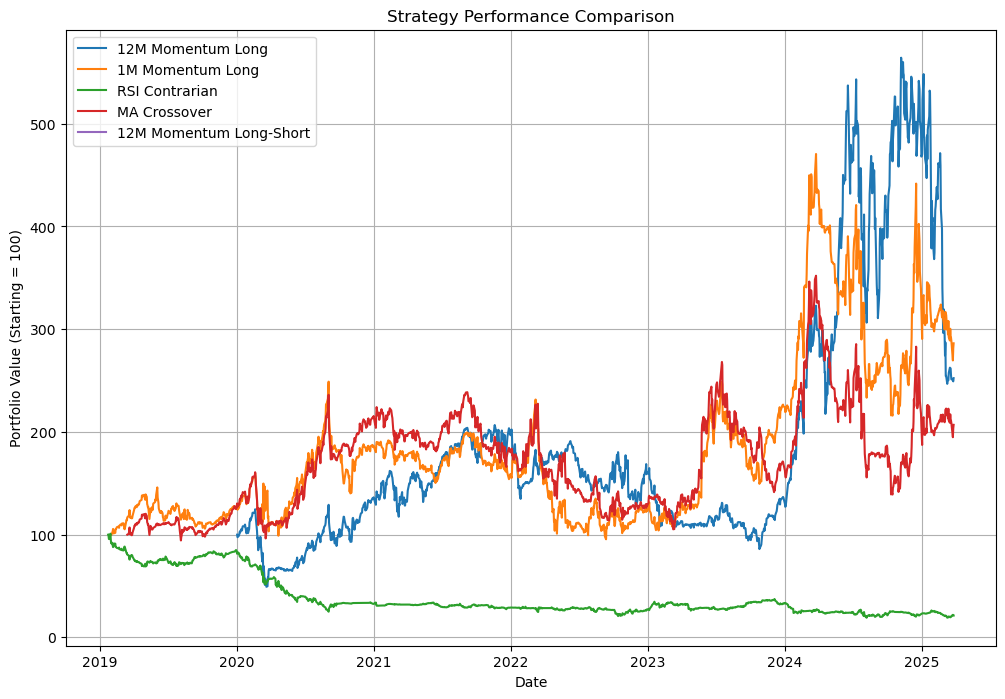

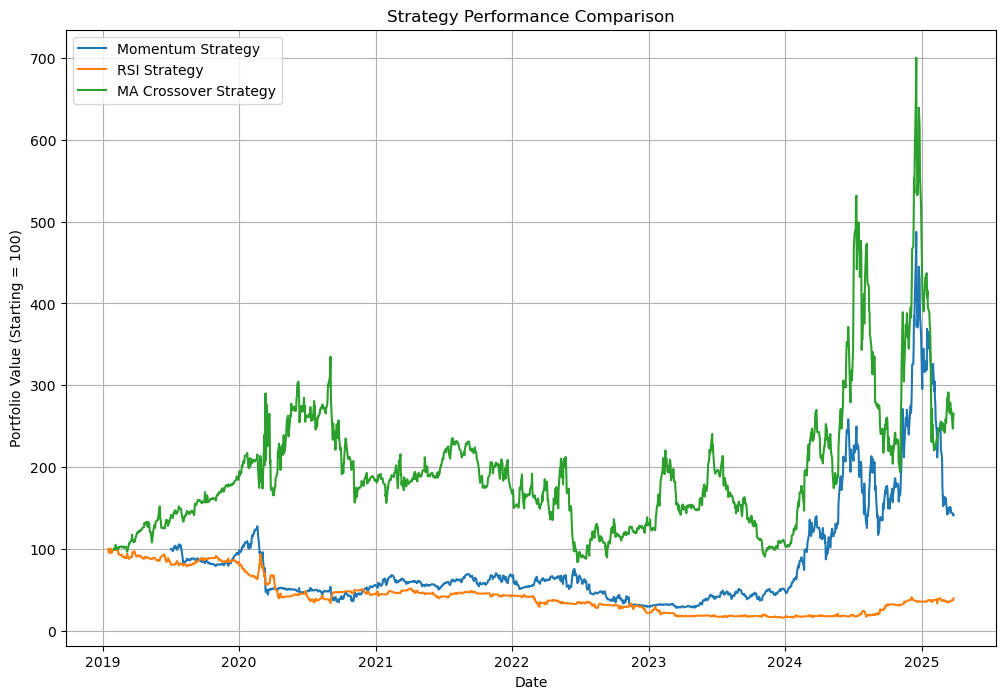

In [16]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Load and prepare the data
# In a real scenario, you'd load from a file, but I'll implement as if the data is already loaded
# Let's assume the data is in a DataFrame called 'etf_data' with dates as the index and tickers as columns

# Sample data generation (in reality, you would use your actual data)
# def prepare_sample_data():
#     # Create a synthetic dataset for demonstration
#     dates = pd.date_range(start='2019-01-02', end='2025-03-27', freq='B')
#     tickers = ['AAXJ', 'ACWI', 'ACWX', 'AIQ', 'AIRR', 'ANGL', 'BND', 'BNDX', 'BOTZ', 'BSCP', 
#                'VGSH', 'VIGI', 'VMBS', 'VNQI', 'VONG', 'VONV', 'VWOB', 'VXUS', 'VYMI', 'XT']
    
#     np.random.seed(42)  # For reproducibility
#     data = {}
    
#     for ticker in tickers:
#         # Generate a random starting price between 20 and 100
#         start_price = np.random.uniform(20, 100)
#         # Generate a random walk with some trend
#         price_series = [start_price]
        
#         for i in range(1, len(dates)):
#             # Daily return with small trend and volatility
#             daily_return = np.random.normal(0.0002, 0.01)  # Mean and std deviation
#             new_price = price_series[-1] * (1 + daily_return)
#             price_series.append(new_price)
        
#         data[ticker] = price_series
    
#     df = pd.DataFrame(data, index=dates)
#     return df

# Use this for demonstration purposes
# etf_data = prepare_sample_data()
etf_data = df

# -------------------- STRATEGY FUNCTIONS --------------------

def calculate_momentum(data, lookback_period):
    """Calculate momentum as percentage price change over the lookback period"""
    return data.pct_change(lookback_period)

def calculate_rsi(data, window=14):
    """Calculate RSI for each ETF"""
    delta = data.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    
    return rsi

def calculate_moving_average(data, window=50):
    """Calculate moving average for each ETF"""
    return data.rolling(window=window).mean()

def create_strategy(data, 
                    strategy_type='momentum',         # 'momentum', 'rsi', 'ma_crossover'
                    lookback_period=252,              # for momentum strategy (trading days)
                    rsi_window=14,                    # for RSI calculation
                    ma_window=50,                     # for Moving Average calculation
                    rebalance_period=21,              # days between rebalancing
                    num_stocks=10,                    # number of stocks to select for each portfolio
                    portfolio_type='long_short'):     # 'long', 'short', or 'long_short'
    """
    Create a trading strategy with customizable parameters
    
    Parameters:
    -----------
    data : pandas.DataFrame
        ETF price data with dates as index and tickers as columns
    strategy_type : str
        Type of strategy to use ('momentum', 'rsi', 'ma_crossover')
    lookback_period : int
        Lookback period for momentum calculation in trading days
    rsi_window : int
        Window for RSI calculation in trading days
    ma_window : int
        Window for Moving Average calculation in trading days
    rebalance_period : int
        Number of days between portfolio rebalancing
    num_stocks : int
        Number of stocks to select for each portfolio
    portfolio_type : str
        Type of portfolio to create ('long', 'short', or 'long_short')
    
    Returns:
    --------
    dict
        Dictionary containing portfolio values and holdings
    """
    # Validate inputs
    if strategy_type not in ['momentum', 'rsi', 'ma_crossover']:
        raise ValueError("strategy_type must be one of 'momentum', 'rsi', or 'ma_crossover'")
    
    if portfolio_type not in ['long', 'short', 'long_short']:
        raise ValueError("portfolio_type must be one of 'long', 'short', or 'long_short'")
    
    # Calculate strategy indicators based on the strategy type
    if strategy_type == 'momentum':
        indicator = calculate_momentum(data, lookback_period)
        min_start_idx = lookback_period
    elif strategy_type == 'rsi':
        indicator = calculate_rsi(data, window=rsi_window)
        min_start_idx = rsi_window
    elif strategy_type == 'ma_crossover':
        # For MA crossover, we use the ratio of price to its moving average
        ma = calculate_moving_average(data, window=ma_window)
        indicator = data / ma
        min_start_idx = ma_window
    
    # Initialize portfolio performance trackers
    portfolio_top = pd.Series(index=data.index, dtype=float)
    portfolio_bottom = pd.Series(index=data.index, dtype=float)
    
    # Track holdings for each portfolio
    portfolio_top_holdings = pd.DataFrame(index=data.index, columns=data.columns, dtype=bool)
    portfolio_bottom_holdings = pd.DataFrame(index=data.index, columns=data.columns, dtype=bool)
    
    # Initialize with NaN for the initial period
    portfolio_top.iloc[:min_start_idx] = np.nan
    portfolio_bottom.iloc[:min_start_idx] = np.nan
    
    # Determine rebalancing dates
    rebalance_dates = []
    current_date = data.index[min_start_idx]  # Start after the minimum required data
    while current_date <= data.index[-1]:
        rebalance_dates.append(current_date)
        # Find the next trading date that is at least rebalance_period ahead
        next_date = current_date + pd.Timedelta(days=rebalance_period)
        while next_date not in data.index and next_date <= data.index[-1]:
            next_date += pd.Timedelta(days=1)
        
        if next_date > data.index[-1]:
            break
            
        current_date = next_date
    
    # Initial portfolio value
    portfolio_value_top = 100.0
    portfolio_value_bottom = 100.0
    
    # For each rebalancing date
    for i, rebalance_date in enumerate(rebalance_dates):
        # Get the index position of the rebalance date
        idx = data.index.get_loc(rebalance_date)
        
        # Select top and bottom performers based on the strategy
        if strategy_type == 'momentum':
            # For momentum, high values = good performance
            top_assets = indicator.iloc[idx].nlargest(num_stocks).index
            bottom_assets = indicator.iloc[idx].nsmallest(num_stocks).index
        elif strategy_type == 'rsi':
            # For RSI, low values = oversold (buy), high values = overbought (sell)
            top_assets = indicator.iloc[idx].nsmallest(num_stocks).index
            bottom_assets = indicator.iloc[idx].nlargest(num_stocks).index
        elif strategy_type == 'ma_crossover':
            # For MA crossover, values > 1 mean price is above MA (buy), values < 1 mean price is below MA (sell)
            top_assets = indicator.iloc[idx].nlargest(num_stocks).index
            bottom_assets = indicator.iloc[idx].nsmallest(num_stocks).index
        
        # Update holdings for this rebalance period
        for ticker in data.columns:
            portfolio_top_holdings.loc[rebalance_date, ticker] = ticker in top_assets
            portfolio_bottom_holdings.loc[rebalance_date, ticker] = ticker in bottom_assets
        
        # Find the next rebalance date or the end of data
        next_rebalance_date = rebalance_dates[i+1] if i+1 < len(rebalance_dates) else data.index[-1]
        period_dates = data.index[(data.index >= rebalance_date) & (data.index <= next_rebalance_date)]
        
        # Calculate daily returns for each ETF during this period
        daily_returns = data.loc[period_dates].pct_change()
        daily_returns.iloc[0] = 0  # Set first day's return to 0 to avoid NaN
        
        # Calculate equally-weighted portfolio returns for each day
        for date in period_dates:
            if date == rebalance_date:
                # Record the portfolio value at rebalance date
                portfolio_top.loc[date] = portfolio_value_top
                portfolio_bottom.loc[date] = portfolio_value_bottom
                continue
                
            # Get current holdings
            current_top = portfolio_top_holdings.loc[rebalance_date]
            current_bottom = portfolio_bottom_holdings.loc[rebalance_date]
            
            # Calculate portfolio returns (equally weighted)
            port_return_top = daily_returns.loc[date, current_top].mean()
            port_return_bottom = daily_returns.loc[date, current_bottom].mean()
            
            # Update portfolio values
            portfolio_value_top *= (1 + port_return_top)
            portfolio_value_bottom *= (1 + port_return_bottom)
            
            # Record portfolio values
            portfolio_top.loc[date] = portfolio_value_top
            portfolio_bottom.loc[date] = portfolio_value_bottom
            
            # Copy holdings forward
            portfolio_top_holdings.loc[date] = portfolio_top_holdings.loc[rebalance_date]
            portfolio_bottom_holdings.loc[date] = portfolio_bottom_holdings.loc[rebalance_date]
    
    # Construct the requested portfolio type
    if portfolio_type == 'long':
        final_portfolio = portfolio_top
        final_holdings = portfolio_top_holdings
    elif portfolio_type == 'short':
        final_portfolio = portfolio_bottom
        final_holdings = portfolio_bottom_holdings
    else:  # long_short
        final_portfolio = portfolio_top - portfolio_bottom
        # For long-short, we create a combined holdings dataframe
        final_holdings = pd.DataFrame(index=data.index, columns=data.columns)
        for date in data.index:
            if date in portfolio_top_holdings.index and date in portfolio_bottom_holdings.index:
                for ticker in data.columns:
                    # 1 for long, -1 for short, 0 for no position
                    if portfolio_top_holdings.loc[date, ticker]:
                        final_holdings.loc[date, ticker] = 1
                    elif portfolio_bottom_holdings.loc[date, ticker]:
                        final_holdings.loc[date, ticker] = -1
                    else:
                        final_holdings.loc[date, ticker] = 0
    
    return {
        'portfolio_values': final_portfolio,
        'holdings': final_holdings,
        'portfolio_top': portfolio_top,
        'portfolio_bottom': portfolio_bottom,
        'top_holdings': portfolio_top_holdings,
        'bottom_holdings': portfolio_bottom_holdings
    }

# -------------------- PERFORMANCE ANALYSIS --------------------

def calculate_performance_metrics(portfolio_values):
    """Calculate performance metrics for a portfolio"""
    # Calculate daily returns
    daily_returns = portfolio_values.pct_change().dropna()
    
    # Calculate metrics
    total_return = (portfolio_values.iloc[-1] / portfolio_values.iloc[0]) - 1
    annual_return = (1 + total_return) ** (252 / len(portfolio_values)) - 1
    volatility = daily_returns.std() * np.sqrt(252)
    sharpe_ratio = annual_return / volatility if volatility > 0 else 0
    max_drawdown = (portfolio_values / portfolio_values.cummax() - 1).min()
    
    return {
        'Total Return': total_return,
        'Annual Return': annual_return,
        'Volatility': volatility,
        'Sharpe Ratio': sharpe_ratio,
        'Max Drawdown': max_drawdown
    }

def plot_strategy_performance(strategies_dict, title="Strategy Performance"):
    """Plot the performance of multiple strategies"""
    plt.figure(figsize=(12, 8))
    
    for name, portfolio in strategies_dict.items():
        # Normalize to 100
        normalized = 100 * portfolio / portfolio.iloc[0]
        plt.plot(normalized.index, normalized, label=name)
    
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Portfolio Value (Starting = 100)')
    plt.legend()
    plt.grid(True)
    return plt

# -------------------- EXAMPLE USAGE --------------------

def run_strategies(data, strategy_configs):
    """Run multiple strategies with different configurations"""
    results = {}
    metrics = {}
    
    for name, config in strategy_configs.items():
        print(f"Running strategy: {name}")
        result = create_strategy(
            data,
            strategy_type=config.get('strategy_type', 'momentum'),
            lookback_period=config.get('lookback_period', 252),
            rsi_window=config.get('rsi_window', 14),
            ma_window=config.get('ma_window', 50),
            rebalance_period=config.get('rebalance_period', 21),
            num_stocks=config.get('num_stocks', 10),
            portfolio_type=config.get('portfolio_type', 'long_short')
        )
        
        # Store the portfolio values
        results[name] = result['portfolio_values'].dropna()
        
        # Calculate performance metrics
        metrics[name] = calculate_performance_metrics(result['portfolio_values'].dropna())
    
    # Create performance metrics dataframe
    metrics_df = pd.DataFrame(metrics).T
    
    # Plot the strategy performance
    plot = plot_strategy_performance(results, "Strategy Performance Comparison")
    
    return {
        'results': results,
        'metrics': metrics_df,
        'plot': plot
    }

# Define strategy configurations
strategy_configs = {
    '12M Momentum Long': {
        'strategy_type': 'momentum',
        'lookback_period': 252,  # Approximately 12 months of trading days
        'rebalance_period': 21,  # Approximately 1 month of trading days
        'num_stocks': 10,
        'portfolio_type': 'long'
    },
    '1M Momentum Long': {
        'strategy_type': 'momentum',
        'lookback_period': 21,   # Approximately 1 month of trading days
        'rebalance_period': 21,
        'num_stocks': 10,
        'portfolio_type': 'long'
    },
    'RSI Contrarian': {
        'strategy_type': 'rsi',
        'rsi_window': 14,
        'rebalance_period': 21,
        'num_stocks': 10,
        'portfolio_type': 'long'  # Buy oversold stocks (contrarian)
    },
    'MA Crossover': {
        'strategy_type': 'ma_crossover',
        'ma_window': 50,
        'rebalance_period': 21,
        'num_stocks': 10,
        'portfolio_type': 'long'  # Buy stocks above their moving average
    },
    '12M Momentum Long-Short': {
        'strategy_type': 'momentum',
        'lookback_period': 252,
        'rebalance_period': 21,
        'num_stocks': 10,
        'portfolio_type': 'long_short'
    }
}

# Run the strategies
strategy_results = run_strategies(etf_data, strategy_configs)

# Display the performance metrics
print("\nPerformance Metrics:")
print(strategy_results['metrics'])

# Save the plot
strategy_results['plot'].savefig('strategy_performance.png')
print("\nAnalysis complete. Performance metrics and plots have been generated.")

# -------------------- CUSTOM STRATEGY FUNCTION --------------------

def create_custom_strategy(data, 
                          lookback_period=252,  # For momentum
                          rsi_window=14,        # For RSI
                          ma_window=50,         # For moving average
                          rebalance_period=21,  # Days between rebalancing
                          num_stocks=10,        # Number of stocks to select
                          portfolio_type='long_short'):  # 'long', 'short', 'long_short'
    """
    Create a custom strategy with user-specified parameters
    
    Returns the strategy results and performance metrics
    """
    print(f"Creating custom strategy with parameters:")
    print(f"  - Lookback period: {lookback_period} days")
    print(f"  - RSI window: {rsi_window} days")
    print(f"  - MA window: {ma_window} days")
    print(f"  - Rebalance period: {rebalance_period} days")
    print(f"  - Number of stocks: {num_stocks}")
    print(f"  - Portfolio type: {portfolio_type}")
    
    # Define the configurations for the custom strategy
    configs = {
        'Momentum Strategy': {
            'strategy_type': 'momentum',
            'lookback_period': lookback_period,
            'rebalance_period': rebalance_period,
            'num_stocks': num_stocks,
            'portfolio_type': portfolio_type
        },
        'RSI Strategy': {
            'strategy_type': 'rsi',
            'rsi_window': rsi_window,
            'rebalance_period': rebalance_period,
            'num_stocks': num_stocks,
            'portfolio_type': portfolio_type
        },
        'MA Crossover Strategy': {
            'strategy_type': 'ma_crossover',
            'ma_window': ma_window,
            'rebalance_period': rebalance_period,
            'num_stocks': num_stocks,
            'portfolio_type': portfolio_type
        }
    }
    
    # Run the strategies
    results = run_strategies(data, configs)
    
    return results

# Example of running a custom strategy with specific parameters
custom_results = create_custom_strategy(
    etf_data,
    lookback_period=126,     # Approximately 6 months
    rsi_window=10,
    ma_window=20,
    rebalance_period=10,     # 10-day rebalancing
    num_stocks=5,            # Top/bottom 5 stocks
    portfolio_type='long'    # Long-only portfolio
)

print("\nCustom Strategy Performance Metrics:")
print(custom_results['metrics'])
custom_results['plot'].savefig('custom_strategy_performance.png')

Running combined strategies...
Running strategy: Momentum Only
Running strategy: RSI Only
Running strategy: MA Only
Running strategy: Momentum + RSI (AND)
Running strategy: All Strategies (AND)
Running strategy: All Strategies (OR)

Performance Metrics for Combined Strategies:
                      Total Return  Annual Return  Volatility  Sharpe Ratio  \
Momentum Only                  inf            inf         NaN           0.0   
RSI Only                      -inf            inf         NaN           0.0   
MA Only                        inf            inf         NaN           0.0   
Momentum + RSI (AND)           inf            inf         NaN           0.0   
All Strategies (AND)           inf            inf         NaN           0.0   
All Strategies (OR)            inf            inf         NaN           0.0   

                      Max Drawdown  
Momentum Only                 -inf  
RSI Only                      -inf  
MA Only                  -1.400442  
Momentum + RSI (AND)

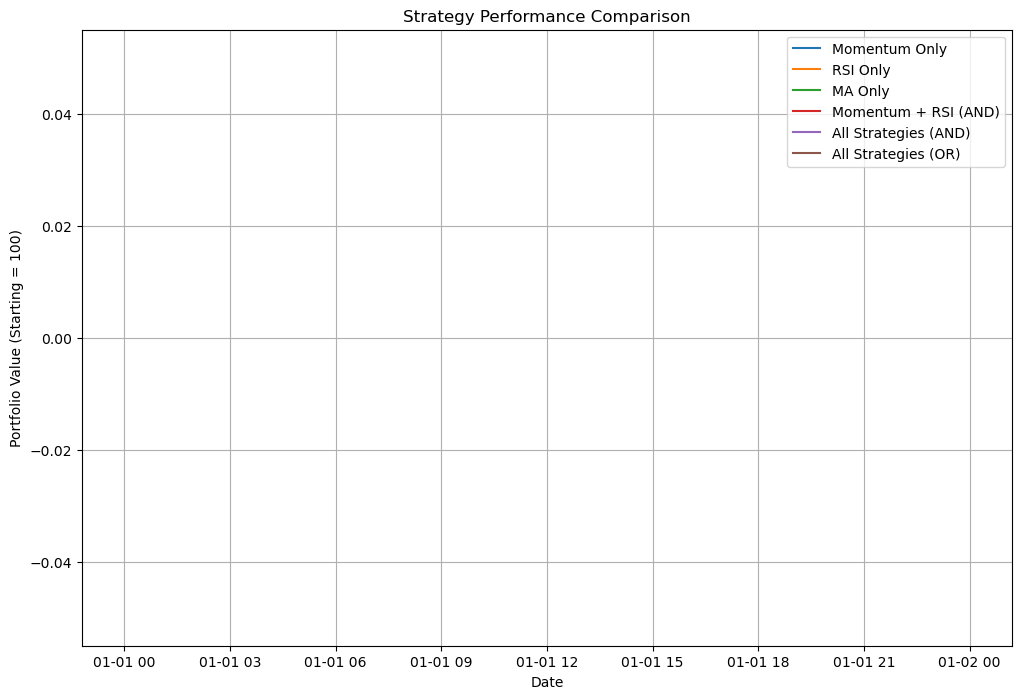

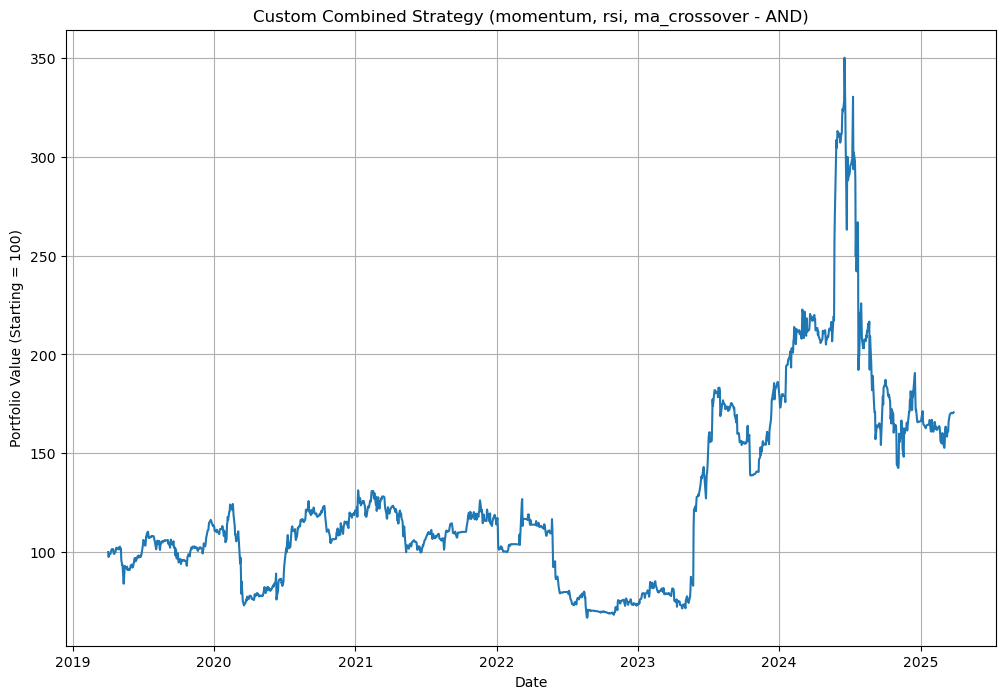

In [17]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Load and prepare the data
# In a real scenario, you'd load from a file, but I'll implement as if the data is already loaded
# Let's assume the data is in a DataFrame called 'etf_data' with dates as the index and tickers as columns

# Sample data generation (in reality, you would use your actual data)
# def prepare_sample_data():
#     # Create a synthetic dataset for demonstration
#     dates = pd.date_range(start='2019-01-02', end='2025-03-27', freq='B')
#     tickers = ['AAXJ', 'ACWI', 'ACWX', 'AIQ', 'AIRR', 'ANGL', 'BND', 'BNDX', 'BOTZ', 'BSCP', 
#                'VGSH', 'VIGI', 'VMBS', 'VNQI', 'VONG', 'VONV', 'VWOB', 'VXUS', 'VYMI', 'XT']
    
#     np.random.seed(42)  # For reproducibility
#     data = {}
    
#     for ticker in tickers:
#         # Generate a random starting price between 20 and 100
#         start_price = np.random.uniform(20, 100)
#         # Generate a random walk with some trend
#         price_series = [start_price]
        
#         for i in range(1, len(dates)):
#             # Daily return with small trend and volatility
#             daily_return = np.random.normal(0.0002, 0.01)  # Mean and std deviation
#             new_price = price_series[-1] * (1 + daily_return)
#             price_series.append(new_price)
        
#         data[ticker] = price_series
    
#     df = pd.DataFrame(data, index=dates)
#     return df

# Use this for demonstration purposes
etf_data = df

# -------------------- STRATEGY INDICATOR FUNCTIONS --------------------

def calculate_momentum(data, lookback_period):
    """Calculate momentum as percentage price change over the lookback period"""
    return data.pct_change(lookback_period)

def calculate_rsi(data, window=14):
    """Calculate RSI for each ETF"""
    delta = data.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    
    return rsi

def calculate_moving_average(data, window=50):
    """Calculate moving average for each ETF"""
    return data.rolling(window=window).mean()

# -------------------- COMBINED STRATEGY FUNCTION --------------------

# def create_combined_strategy(data, 
#                             strategy_types=['momentum'],  # List of strategies to use: 'momentum', 'rsi', 'ma_crossover'
#                             lookback_period=252,          # for momentum strategy (trading days)
#                             rsi_window=14,                # for RSI calculation
#                             ma_window=50,                 # for Moving Average calculation
#                             rebalance_period=21,          # days between rebalancing
#                             num_stocks=10,                # number of stocks to select for each portfolio
#                             portfolio_type='long_short',  # 'long', 'short', or 'long_short'
#                             combine_method='and'):        # 'and' or 'or' for combining strategies
#     """
#     Create a trading strategy with customizable parameters that can combine multiple strategy types
    
#     Parameters:
#     -----------
#     data : pandas.DataFrame
#         ETF price data with dates as index and tickers as columns
#     strategy_types : list
#         List of strategies to use ['momentum', 'rsi', 'ma_crossover']
#     lookback_period : int
#         Lookback period for momentum calculation in trading days
#     rsi_window : int
#         Window for RSI calculation in trading days
#     ma_window : int
#         Window for Moving Average calculation in trading days
#     rebalance_period : int
#         Number of days between portfolio rebalancing
#     num_stocks : int
#         Number of stocks to select for each portfolio
#     portfolio_type : str
#         Type of portfolio to create ('long', 'short', or 'long_short')
#     combine_method : str
#         Method to combine strategies ('and' or 'or')
    
#     Returns:
#     --------
#     dict
#         Dictionary containing portfolio values and holdings
#     """
#     # Validate inputs
#     for strategy in strategy_types:
#         if strategy not in ['momentum', 'rsi', 'ma_crossover']:
#             raise ValueError(f"Invalid strategy type: {strategy}. Must be one of 'momentum', 'rsi', or 'ma_crossover'")
    
#     if portfolio_type not in ['long', 'short', 'long_short']:
#         raise ValueError("portfolio_type must be one of 'long', 'short', or 'long_short'")
    
#     if combine_method not in ['and', 'or']:
#         raise ValueError("combine_method must be either 'and' or 'or'")
    
#     # Determine the minimum start index based on the strategies used
#     min_start_indices = []
#     if 'momentum' in strategy_types:
#         min_start_indices.append(lookback_period)
#     if 'rsi' in strategy_types:
#         min_start_indices.append(rsi_window)
#     if 'ma_crossover' in strategy_types:
#         min_start_indices.append(ma_window)
    
#     min_start_idx = max(min_start_indices) if min_start_indices else 0
    
#     # Calculate indicators for each strategy
#     indicators = {}
#     rankings = {}
    
#     if 'momentum' in strategy_types:
#         indicators['momentum'] = calculate_momentum(data, lookback_period)
    
#     if 'rsi' in strategy_types:
#         indicators['rsi'] = calculate_rsi(data, window=rsi_window)
    
#     if 'ma_crossover' in strategy_types:
#         ma = calculate_moving_average(data, window=ma_window)
#         indicators['ma_crossover'] = data / ma
    
#     # Initialize portfolio performance trackers
#     portfolio_top = pd.Series(index=data.index, dtype=float)
#     portfolio_bottom = pd.Series(index=data.index, dtype=float)
    
#     # Track holdings for each portfolio
#     portfolio_top_holdings = pd.DataFrame(index=data.index, columns=data.columns, dtype=bool)
#     portfolio_bottom_holdings = pd.DataFrame(index=data.index, columns=data.columns, dtype=bool)
    
#     # Initialize with NaN for the initial period
#     portfolio_top.iloc[:min_start_idx] = np.nan
#     portfolio_bottom.iloc[:min_start_idx] = np.nan
    
#     # Determine rebalancing dates
#     rebalance_dates = []
#     current_date = data.index[min_start_idx]  # Start after the minimum required data
#     while current_date <= data.index[-1]:
#         rebalance_dates.append(current_date)
#         # Find the next trading date that is at least rebalance_period ahead
#         next_date = current_date + pd.Timedelta(days=rebalance_period)
#         while next_date not in data.index and next_date <= data.index[-1]:
#             next_date += pd.Timedelta(days=1)
        
#         if next_date > data.index[-1]:
#             break
            
#         current_date = next_date
    
#     # Initial portfolio value
#     portfolio_value_top = 100.0
#     portfolio_value_bottom = 100.0
    
#     # For each rebalancing date
#     for i, rebalance_date in enumerate(rebalance_dates):
#         # Get the index position of the rebalance date
#         idx = data.index.get_loc(rebalance_date)
        
#         # Calculate rankings for each strategy
#         for strategy in strategy_types:
#             indicator_values = indicators[strategy].iloc[idx]
            
#             if strategy == 'momentum':
#                 # For momentum, high values = good performance
#                 rankings[f'{strategy}_top'] = indicator_values.rank(ascending=False)
#                 rankings[f'{strategy}_bottom'] = indicator_values.rank(ascending=True)
#             elif strategy == 'rsi':
#                 # For RSI, low values = oversold (buy), high values = overbought (sell)
#                 rankings[f'{strategy}_top'] = indicator_values.rank(ascending=True)
#                 rankings[f'{strategy}_bottom'] = indicator_values.rank(ascending=False)
#             elif strategy == 'ma_crossover':
#                 # For MA crossover, values > 1 mean price is above MA (buy), values < 1 mean price is below MA (sell)
#                 rankings[f'{strategy}_top'] = indicator_values.rank(ascending=False)
#                 rankings[f'{strategy}_bottom'] = indicator_values.rank(ascending=True)
        
#         # Combine rankings based on the combine_method
#         if len(strategy_types) > 1:
#             if combine_method == 'and':
#                 # For 'and', we sum the ranks (lower sum = better combined rank)
#                 combined_top_rank = sum([rankings[f'{strategy}_top'] for strategy in strategy_types])
#                 combined_bottom_rank = sum([rankings[f'{strategy}_bottom'] for strategy in strategy_types])
#             else:  # 'or'
#                 # For 'or', we take the minimum rank (best in any strategy)
#                 combined_top_rank = pd.DataFrame([rankings[f'{strategy}_top'] for strategy in strategy_types]).min()
#                 combined_bottom_rank = pd.DataFrame([rankings[f'{strategy}_bottom'] for strategy in strategy_types]).min()
#         else:
#             # If only one strategy, use its rankings directly
#             combined_top_rank = rankings[f'{strategy_types[0]}_top']
#             combined_bottom_rank = rankings[f'{strategy_types[0]}_bottom']
        
#         # Select top and bottom performers based on the combined rankings
#         top_assets = combined_top_rank.nsmallest(num_stocks).index
#         bottom_assets = combined_bottom_rank.nsmallest(num_stocks).index
        
#         # Update holdings for this rebalance period
#         for ticker in data.columns:
#             portfolio_top_holdings.loc[rebalance_date, ticker] = ticker in top_assets
#             portfolio_bottom_holdings.loc[rebalance_date, ticker] = ticker in bottom_assets
        
#         # Find the next rebalance date or the end of data
#         next_rebalance_date = rebalance_dates[i+1] if i+1 < len(rebalance_dates) else data.index[-1]
#         period_dates = data.index[(data.index >= rebalance_date) & (data.index <= next_rebalance_date)]
        
#         # Calculate daily returns for each ETF during this period
#         daily_returns = data.loc[period_dates].pct_change()
#         daily_returns.iloc[0] = 0  # Set first day's return to 0 to avoid NaN
        
#         # Calculate equally-weighted portfolio returns for each day
#         for date in period_dates:
#             if date == rebalance_date:
#                 # Record the portfolio value at rebalance date
#                 portfolio_top.loc[date] = portfolio_value_top
#                 portfolio_bottom.loc[date] = portfolio_value_bottom
#                 continue
                
#             # Get current holdings
#             current_top = portfolio_top_holdings.loc[rebalance_date]
#             current_bottom = portfolio_bottom_holdings.loc[rebalance_date]
            
#             # Calculate portfolio returns (equally weighted)
#             port_return_top = daily_returns.loc[date, current_top].mean() if current_top.any() else 0
#             port_return_bottom = daily_returns.loc[date, current_bottom].mean() if current_bottom.any() else 0
            
#             # Update portfolio values
#             portfolio_value_top *= (1 + port_return_top)
#             portfolio_value_bottom *= (1 + port_return_bottom)
            
#             # Record portfolio values
#             portfolio_top.loc[date] = portfolio_value_top
#             portfolio_bottom.loc[date] = portfolio_value_bottom
            
#             # Copy holdings forward
#             portfolio_top_holdings.loc[date] = portfolio_top_holdings.loc[rebalance_date]
#             portfolio_bottom_holdings.loc[date] = portfolio_bottom_holdings.loc[rebalance_date]
    
#     # Construct the requested portfolio type
#     if portfolio_type == 'long':
#         final_portfolio = portfolio_top
#         final_holdings = portfolio_top_holdings
#     elif portfolio_type == 'short':
#         final_portfolio = portfolio_bottom
#         final_holdings = portfolio_bottom_holdings
#     else:  # long_short
#         final_portfolio = portfolio_top - portfolio_bottom
#         # For long-short, we create a combined holdings dataframe
#         final_holdings = pd.DataFrame(index=data.index, columns=data.columns)
#         for date in data.index:
#             if date in portfolio_top_holdings.index and date in portfolio_bottom_holdings.index:
#                 for ticker in data.columns:
#                     # 1 for long, -1 for short, 0 for no position
#                     if portfolio_top_holdings.loc[date, ticker]:
#                         final_holdings.loc[date, ticker] = 1
#                     elif portfolio_bottom_holdings.loc[date, ticker]:
#                         final_holdings.loc[date, ticker] = -1
#                     else:
#                         final_holdings.loc[date, ticker] = 0
    
#     return {
#         'portfolio_values': final_portfolio,
#         'holdings': final_holdings,
#         'portfolio_top': portfolio_top,
#         'portfolio_bottom': portfolio_bottom,
#         'top_holdings': portfolio_top_holdings,
#         'bottom_holdings': portfolio_bottom_holdings,
#         'strategies_used': strategy_types,
#         'combine_method': combine_method
#     }

def create_combined_strategy(data, 
                            strategy_types=['momentum'],  
                            lookback_period=252,         
                            rsi_window=14,               
                            ma_window=50,                
                            rebalance_period=21,         
                            num_stocks=10,               
                            portfolio_type='long_short', 
                            combine_method='and'):       
    """
    Create a trading strategy with customizable parameters that can combine multiple strategy types
    
    Parameters:
    -----------
    data : pandas.DataFrame
        ETF price data with dates as index and tickers as columns
    strategy_types : list
        List of strategies to use ['momentum', 'rsi', 'ma_crossover']
    lookback_period : int
        Lookback period for momentum calculation in trading days
    rsi_window : int
        Window for RSI calculation in trading days
    ma_window : int
        Window for Moving Average calculation in trading days
    rebalance_period : int
        Number of days between portfolio rebalancing
    num_stocks : int
        Number of stocks to select for each portfolio
    portfolio_type : str
        Type of portfolio to create ('long', 'short', or 'long_short')
    combine_method : str
        Method to combine strategies ('and' or 'or')
    
    Returns:
    --------
    dict
        Dictionary containing portfolio values and holdings
    """
    # Validate inputs
    for strategy in strategy_types:
        if strategy not in ['momentum', 'rsi', 'ma_crossover']:
            raise ValueError(f"Invalid strategy type: {strategy}. Must be one of 'momentum', 'rsi', or 'ma_crossover'")
    
    if portfolio_type not in ['long', 'short', 'long_short']:
        raise ValueError("portfolio_type must be one of 'long', 'short', or 'long_short'")
    
    if combine_method not in ['and', 'or']:
        raise ValueError("combine_method must be either 'and' or 'or'")
    
    # Determine the minimum start index based on the strategies used
    min_start_indices = []
    if 'momentum' in strategy_types:
        min_start_indices.append(lookback_period)
    if 'rsi' in strategy_types:
        min_start_indices.append(rsi_window)
    if 'ma_crossover' in strategy_types:
        min_start_indices.append(ma_window)
    
    min_start_idx = max(min_start_indices) if min_start_indices else 0
    
    # Calculate indicators for each strategy
    indicators = {}
    rankings = {}
    
    if 'momentum' in strategy_types:
        indicators['momentum'] = calculate_momentum(data, lookback_period)
    
    if 'rsi' in strategy_types:
        indicators['rsi'] = calculate_rsi(data, window=rsi_window)
    
    if 'ma_crossover' in strategy_types:
        ma = calculate_moving_average(data, window=ma_window)
        indicators['ma_crossover'] = data / ma
    
    # Initialize portfolio performance trackers
    portfolio_top = pd.Series(index=data.index, dtype=float)
    portfolio_bottom = pd.Series(index=data.index, dtype=float)
    portfolio_combined = pd.Series(index=data.index, dtype=float)  # For long-short
    
    # Track holdings for each portfolio
    portfolio_top_holdings = pd.DataFrame(index=data.index, columns=data.columns, dtype=bool)
    portfolio_bottom_holdings = pd.DataFrame(index=data.index, columns=data.columns, dtype=bool)
    
    # Initialize with NaN for the initial period
    portfolio_top.iloc[:min_start_idx] = np.nan
    portfolio_bottom.iloc[:min_start_idx] = np.nan
    portfolio_combined.iloc[:min_start_idx] = np.nan
    
    # Determine rebalancing dates
    rebalance_dates = []
    current_date = data.index[min_start_idx]  # Start after the minimum required data
    while current_date <= data.index[-1]:
        rebalance_dates.append(current_date)
        # Find the next trading date that is at least rebalance_period ahead
        next_date = current_date + pd.Timedelta(days=rebalance_period)
        while next_date not in data.index and next_date <= data.index[-1]:
            next_date += pd.Timedelta(days=1)
        
        if next_date > data.index[-1]:
            break
            
        current_date = next_date
    
    # Initial portfolio value
    portfolio_value_top = 100.0
    portfolio_value_bottom = 100.0
    portfolio_value_combined = 100.0  # For long-short
    
    # For each rebalancing date
    for i, rebalance_date in enumerate(rebalance_dates):
        # Get the index position of the rebalance date
        idx = data.index.get_loc(rebalance_date)
        
        # Calculate rankings for each strategy
        for strategy in strategy_types:
            indicator_values = indicators[strategy].iloc[idx]
            
            if strategy == 'momentum':
                # For momentum, high values = good performance
                rankings[f'{strategy}_top'] = indicator_values.rank(ascending=False)
                rankings[f'{strategy}_bottom'] = indicator_values.rank(ascending=True)
            elif strategy == 'rsi':
                # For RSI, low values = oversold (buy), high values = overbought (sell)
                rankings[f'{strategy}_top'] = indicator_values.rank(ascending=True)
                rankings[f'{strategy}_bottom'] = indicator_values.rank(ascending=False)
            elif strategy == 'ma_crossover':
                # For MA crossover, values > 1 mean price is above MA (buy), values < 1 mean price is below MA (sell)
                rankings[f'{strategy}_top'] = indicator_values.rank(ascending=False)
                rankings[f'{strategy}_bottom'] = indicator_values.rank(ascending=True)
        
        # Combine rankings based on the combine_method
        if len(strategy_types) > 1:
            if combine_method == 'and':
                # For 'and', we sum the ranks (lower sum = better combined rank)
                combined_top_rank = sum([rankings[f'{strategy}_top'] for strategy in strategy_types])
                combined_bottom_rank = sum([rankings[f'{strategy}_bottom'] for strategy in strategy_types])
            else:  # 'or'
                # For 'or', we take the minimum rank (best in any strategy)
                combined_top_rank = pd.DataFrame([rankings[f'{strategy}_top'] for strategy in strategy_types]).min()
                combined_bottom_rank = pd.DataFrame([rankings[f'{strategy}_bottom'] for strategy in strategy_types]).min()
        else:
            # If only one strategy, use its rankings directly
            combined_top_rank = rankings[f'{strategy_types[0]}_top']
            combined_bottom_rank = rankings[f'{strategy_types[0]}_bottom']
        
        # Select top and bottom performers based on the combined rankings
        top_assets = combined_top_rank.nsmallest(num_stocks).index
        bottom_assets = combined_bottom_rank.nsmallest(num_stocks).index
        
        # Update holdings for this rebalance period
        for ticker in data.columns:
            portfolio_top_holdings.loc[rebalance_date, ticker] = ticker in top_assets
            portfolio_bottom_holdings.loc[rebalance_date, ticker] = ticker in bottom_assets
        
        # Find the next rebalance date or the end of data
        next_rebalance_date = rebalance_dates[i+1] if i+1 < len(rebalance_dates) else data.index[-1]
        period_dates = data.index[(data.index >= rebalance_date) & (data.index <= next_rebalance_date)]
        
        # Calculate daily returns for each ETF during this period
        daily_returns = data.loc[period_dates].pct_change()
        daily_returns.iloc[0] = 0  # Set first day's return to 0 to avoid NaN
        
        # Calculate equally-weighted portfolio returns for each day
        for date in period_dates:
            if date == rebalance_date:
                # Record the portfolio values at rebalance date
                portfolio_top.loc[date] = portfolio_value_top
                portfolio_bottom.loc[date] = portfolio_value_bottom
                portfolio_combined.loc[date] = portfolio_value_combined
                continue
                
            # Get current holdings
            current_top = portfolio_top_holdings.loc[rebalance_date]
            current_bottom = portfolio_bottom_holdings.loc[rebalance_date]
            
            # Calculate portfolio returns (equally weighted)
            port_return_top = daily_returns.loc[date, current_top].mean() if current_top.any() else 0
            
            # For short positions, we want to make money when prices go down, so flip the sign
            port_return_bottom = -daily_returns.loc[date, current_bottom].mean() if current_bottom.any() else 0
            
            # Update portfolio values
            portfolio_value_top *= (1 + port_return_top)
            portfolio_value_bottom *= (1 + port_return_bottom)
            
            # For long-short, we combine both strategies (half weight to each)
            if portfolio_type == 'long_short':
                port_return_combined = 0.5 * port_return_top + 0.5 * port_return_bottom
                portfolio_value_combined *= (1 + port_return_combined)
            
            # Record portfolio values
            portfolio_top.loc[date] = portfolio_value_top
            portfolio_bottom.loc[date] = portfolio_value_bottom
            portfolio_combined.loc[date] = portfolio_value_combined
            
            # Copy holdings forward
            portfolio_top_holdings.loc[date] = portfolio_top_holdings.loc[rebalance_date]
            portfolio_bottom_holdings.loc[date] = portfolio_bottom_holdings.loc[rebalance_date]
    
    # Construct the requested portfolio type
    if portfolio_type == 'long':
        final_portfolio = portfolio_top
        final_holdings = portfolio_top_holdings
    elif portfolio_type == 'short':
        final_portfolio = portfolio_bottom
        final_holdings = portfolio_bottom_holdings
    else:  # long_short
        final_portfolio = portfolio_combined
        # For long-short, we create a combined holdings dataframe
        final_holdings = pd.DataFrame(index=data.index, columns=data.columns)
        for date in data.index:
            if date in portfolio_top_holdings.index and date in portfolio_bottom_holdings.index:
                for ticker in data.columns:
                    # 1 for long, -1 for short, 0 for no position
                    if portfolio_top_holdings.loc[date, ticker]:
                        final_holdings.loc[date, ticker] = 1
                    elif portfolio_bottom_holdings.loc[date, ticker]:
                        final_holdings.loc[date, ticker] = -1
                    else:
                        final_holdings.loc[date, ticker] = 0
    
    return {
        'portfolio_values': final_portfolio,
        'holdings': final_holdings,
        'portfolio_top': portfolio_top,
        'portfolio_bottom': portfolio_bottom,
        'portfolio_combined': portfolio_combined,
        'top_holdings': portfolio_top_holdings,
        'bottom_holdings': portfolio_bottom_holdings,
        'strategies_used': strategy_types,
        'combine_method': combine_method
    }

# -------------------- PERFORMANCE ANALYSIS --------------------

# def calculate_performance_metrics(portfolio_values):
#     """Calculate performance metrics for a portfolio"""
#     # Calculate daily returns
#     daily_returns = portfolio_values.pct_change().dropna()
    
#     # Calculate metrics
#     total_return = (portfolio_values.iloc[-1] / portfolio_values.iloc[0]) - 1
#     annual_return = (1 + total_return) ** (252 / len(portfolio_values)) - 1
#     volatility = daily_returns.std() * np.sqrt(252)
#     sharpe_ratio = annual_return / volatility if volatility > 0 else 0
#     max_drawdown = (portfolio_values / portfolio_values.cummax() - 1).min()
    
#     return {
#         'Total Return': total_return,
#         'Annual Return': annual_return,
#         'Volatility': volatility,
#         'Sharpe Ratio': sharpe_ratio,
#         'Max Drawdown': max_drawdown
#     }

def calculate_performance_metrics(portfolio_values):
    """Calculate performance metrics for a portfolio with safeguards against invalid values"""
    # Calculate daily returns
    daily_returns = portfolio_values.pct_change().dropna()
    
    # Calculate metrics with safeguards
    try:
        total_return = (portfolio_values.iloc[-1] / portfolio_values.iloc[0]) - 1
    except (ZeroDivisionError, IndexError):
        total_return = float('nan')
    
    # Calculate annual return
    try:
        annual_return = (1 + total_return) ** (252 / len(portfolio_values)) - 1
    except (ValueError, ZeroDivisionError):
        annual_return = float('nan')
    
    # Calculate volatility
    volatility = daily_returns.std() * np.sqrt(252)
    
    # Calculate Sharpe ratio
    try:
        sharpe_ratio = annual_return / volatility if volatility > 0 else 0
    except (ZeroDivisionError, ValueError):
        sharpe_ratio = float('nan')
    
    # Calculate max drawdown
    try:
        max_drawdown = (portfolio_values / portfolio_values.cummax() - 1).min()
    except ValueError:
        max_drawdown = float('nan')
    
    return {
        'Total Return': total_return,
        'Annual Return': annual_return,
        'Volatility': volatility,
        'Sharpe Ratio': sharpe_ratio,
        'Max Drawdown': max_drawdown
    }


def plot_strategy_performance(strategies_dict, title="Strategy Performance"):
    """Plot the performance of multiple strategies"""
    plt.figure(figsize=(12, 8))
    
    for name, portfolio in strategies_dict.items():
        # Normalize to 100
        normalized = 100 * portfolio / portfolio.iloc[0]
        plt.plot(normalized.index, normalized, label=name)
    
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Portfolio Value (Starting = 100)')
    plt.legend()
    plt.grid(True)
    return plt

# -------------------- EXAMPLE USAGE --------------------

def run_combined_strategies(data, strategy_configs):
    """Run multiple strategies with different configurations"""
    results = {}
    metrics = {}
    
    for name, config in strategy_configs.items():
        print(f"Running strategy: {name}")
        result = create_combined_strategy(
            data,
            strategy_types=config.get('strategy_types', ['momentum']),
            lookback_period=config.get('lookback_period', 252),
            rsi_window=config.get('rsi_window', 14),
            ma_window=config.get('ma_window', 50),
            rebalance_period=config.get('rebalance_period', 21),
            num_stocks=config.get('num_stocks', 10),
            portfolio_type=config.get('portfolio_type', 'long_short'),
            combine_method=config.get('combine_method', 'and')
        )
        
        # Store the portfolio values
        results[name] = result['portfolio_values'].dropna()
        
        # Calculate performance metrics
        metrics[name] = calculate_performance_metrics(result['portfolio_values'].dropna())
    
    # Create performance metrics dataframe
    metrics_df = pd.DataFrame(metrics).T
    
    # Plot the strategy performance
    plot = plot_strategy_performance(results, "Strategy Performance Comparison")
    
    return {
        'results': results,
        'metrics': metrics_df,
        'plot': plot
    }

# Define example strategy configurations
combined_strategy_configs = {
    'Momentum Only': {
        'strategy_types': ['momentum'],
        'lookback_period': 252,  # 12 months
        'rebalance_period': 21,
        'num_stocks': 10,
        'portfolio_type': 'long_short'
    },
    'RSI Only': {
        'strategy_types': ['rsi'],
        'rsi_window': 14,
        'rebalance_period': 21,
        'num_stocks': 10,
        'portfolio_type': 'long_short'
    },
    'MA Only': {
        'strategy_types': ['ma_crossover'],
        'ma_window': 50,
        'rebalance_period': 21,
        'num_stocks': 10,
        'portfolio_type': 'long_short'
    },
    'Momentum + RSI (AND)': {
        'strategy_types': ['momentum', 'rsi'],
        'lookback_period': 252,
        'rsi_window': 14,
        'rebalance_period': 21,
        'num_stocks': 10,
        'portfolio_type': 'long_short',
        'combine_method': 'and'
    },
    'All Strategies (AND)': {
        'strategy_types': ['momentum', 'rsi', 'ma_crossover'],
        'lookback_period': 252,
        'rsi_window': 14,
        'ma_window': 50,
        'rebalance_period': 21,
        'num_stocks': 10,
        'portfolio_type': 'long_short',
        'combine_method': 'and'
    },
    'All Strategies (OR)': {
        'strategy_types': ['momentum', 'rsi', 'ma_crossover'],
        'lookback_period': 252,
        'rsi_window': 14,
        'ma_window': 50,
        'rebalance_period': 21,
        'num_stocks': 10,
        'portfolio_type': 'long_short',
        'combine_method': 'or'
    }
}

# Run the combined strategies
print("Running combined strategies...")
combined_results = run_combined_strategies(etf_data, combined_strategy_configs)

# Display the performance metrics
print("\nPerformance Metrics for Combined Strategies:")
print(combined_results['metrics'])

# Save the plot
combined_results['plot'].savefig('combined_strategy_performance.png')
print("\nAnalysis complete. Performance metrics and plots have been generated.")

# -------------------- CUSTOM COMBINED STRATEGY FUNCTION --------------------

def create_custom_combined_strategy(data, 
                                   strategy_types=['momentum', 'rsi'],  # List of strategies to use
                                   lookback_period=252,                # For momentum
                                   rsi_window=14,                      # For RSI
                                   ma_window=50,                       # For moving average
                                   rebalance_period=21,                # Days between rebalancing
                                   num_stocks=10,                      # Number of stocks to select
                                   portfolio_type='long_short',        # 'long', 'short', 'long_short'
                                   combine_method='and'):              # 'and' or 'or'
    """
    Create a custom combined strategy with user-specified parameters
    
    Returns the strategy results and performance metrics
    """
    print(f"Creating custom combined strategy with parameters:")
    print(f"  - Strategies used: {strategy_types}")
    print(f"  - Combination method: {combine_method}")
    print(f"  - Lookback period: {lookback_period} days")
    print(f"  - RSI window: {rsi_window} days")
    print(f"  - MA window: {ma_window} days")
    print(f"  - Rebalance period: {rebalance_period} days")
    print(f"  - Number of stocks: {num_stocks}")
    print(f"  - Portfolio type: {portfolio_type}")
    
    # Create the strategy
    result = create_combined_strategy(
        data,
        strategy_types=strategy_types,
        lookback_period=lookback_period,
        rsi_window=rsi_window,
        ma_window=ma_window,
        rebalance_period=rebalance_period,
        num_stocks=num_stocks,
        portfolio_type=portfolio_type,
        combine_method=combine_method
    )
    
    # Calculate performance metrics
    portfolio_values = result['portfolio_values'].dropna()
    metrics = calculate_performance_metrics(portfolio_values)
    
    # Plot the performance
    plt.figure(figsize=(12, 8))
    plt.plot(portfolio_values.index, portfolio_values / portfolio_values.iloc[0] * 100)
    plt.title(f"Custom Combined Strategy ({', '.join(strategy_types)} - {combine_method.upper()})")
    plt.xlabel('Date')
    plt.ylabel('Portfolio Value (Starting = 100)')
    plt.grid(True)
    
    return {
        'result': result,
        'metrics': metrics,
        'plot': plt
    }
# This fixes the issues in the create_combined_strategy function
# The key changes are in how portfolio values are calculated, especially for short positions


# Example of using the custom combined strategy function
custom_combined = create_custom_combined_strategy(
    etf_data,
    strategy_types=['momentum', 'rsi', 'ma_crossover'],  # Use all three strategies
    lookback_period=63,                                  # ~3 months for momentum
    rsi_window=10,                                       # 10-day RSI
    ma_window=20,                                        # 20-day MA
    rebalance_period=10,                                 # 10-day rebalancing
    num_stocks=5,                                        # Select top/bottom 5 stocks
    portfolio_type='long',                               # Long-only portfolio
    combine_method='and'                                 # Require agreement across strategies
)

print("\nCustom Combined Strategy Performance Metrics:")
print(pd.DataFrame([custom_combined['metrics']]).T)
custom_combined['plot'].savefig('custom_combined_strategy.png')

Creating custom combined strategy with parameters:
  - Strategies used: ['momentum', 'rsi', 'ma_crossover']
  - Combination method: and
  - Lookback period: 252 days
  - RSI window: 10 days
  - MA window: 20 days
  - Rebalance period: 21 days
  - Number of stocks: 5
  - Portfolio type: long

Custom Combined Strategy Performance Metrics:
                      0
Total Return   2.781109
Annual Return  0.290054
Volatility     0.427842
Sharpe Ratio   0.677947
Max Drawdown  -0.420154


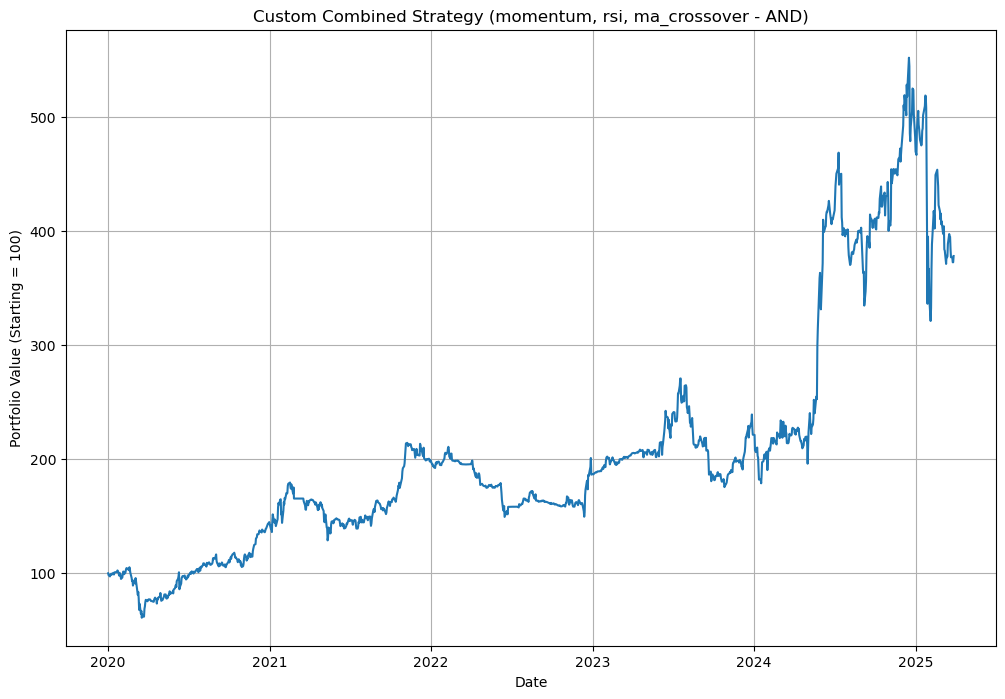

In [18]:
custom_combined = create_custom_combined_strategy(
    etf_data,
    strategy_types=['momentum', 'rsi', 'ma_crossover'],  # Use all three strategies
    lookback_period=252,                                  # ~3 months for momentum
    rsi_window=10,                                       # 10-day RSI
    ma_window=20,                                        # 20-day MA
    rebalance_period=21,                                 # 10-day rebalancing
    num_stocks=5,                                        # Select top/bottom 5 stocks
    portfolio_type='long',                               # Long-only portfolio
    combine_method='and'                                 # Require agreement across strategies
)

print("\nCustom Combined Strategy Performance Metrics:")
print(pd.DataFrame([custom_combined['metrics']]).T)
# custom_combined['plot'].savefig('custom_combined_strategy.png')

Creating custom combined strategy with parameters:
  - Strategies used: ['momentum', 'rsi', 'ma_crossover']
  - Combination method: and
  - Lookback period: 252 days
  - RSI window: 10 days
  - MA window: 20 days
  - Rebalance period: 21 days
  - Number of stocks: 10
  - Portfolio type: long

Custom Combined Strategy Performance Metrics:
                      0
Total Return   2.142509
Annual Return  0.245154
Volatility     0.368849
Sharpe Ratio   0.664647
Max Drawdown  -0.375112


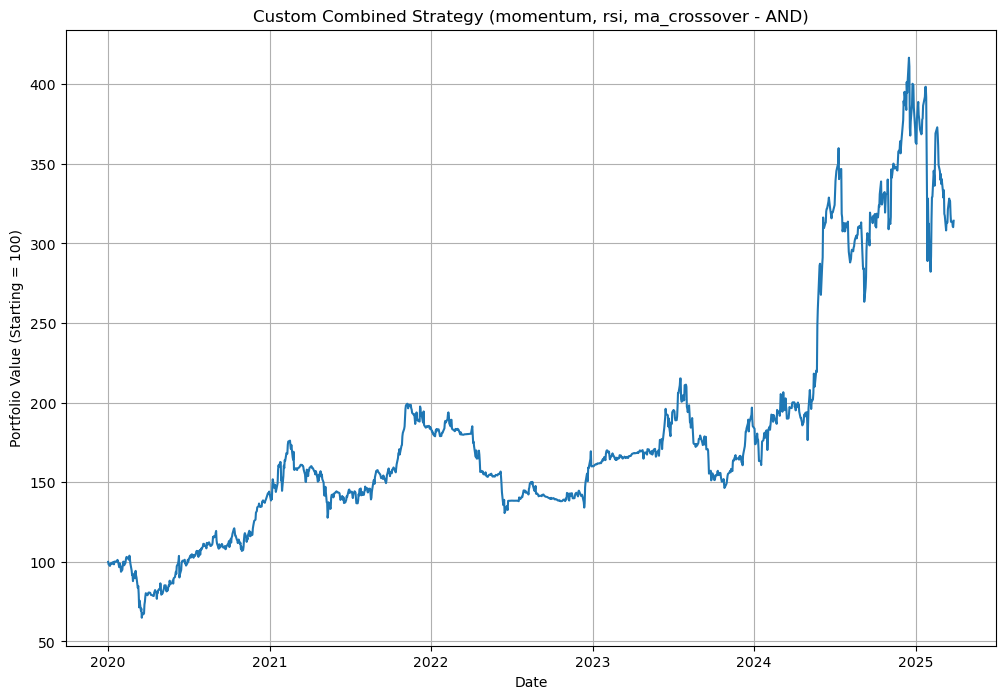

In [24]:
custom_combined = create_custom_combined_strategy(
    etf_data,
    strategy_types=['momentum', 'rsi', 'ma_crossover'],  # Use all three strategies
    lookback_period=252,                                  # ~3 months for momentum
    rsi_window=10,                                       # 10-day RSI
    ma_window=20,                                        # 20-day MA
    rebalance_period=21,                                 # 10-day rebalancing
    num_stocks=10,                                        # Select top/bottom 5 stocks
    portfolio_type='long',                               # Long-only portfolio
    combine_method='and'                                 # Require agreement across strategies
)

print("\nCustom Combined Strategy Performance Metrics:")
print(pd.DataFrame([custom_combined['metrics']]).T)

In [62]:
import pandas as pd
import numpy as np

def calculate_momentum_indicators(df, lookback=3, rsi_window=14, ma_window=50):
    """
    Calculate all required momentum indicators for each asset in the dataframe.
    """
    # Create a copy of the dataframe to avoid SettingWithCopyWarning
    df = df.copy()
    
    # Calculate returns for each asset
    for column in df.columns:
        # 3-month (lookback) price performance
        df[f'{column}_3m_return'] = df[column].pct_change(lookback * 21)  # Approx 21 trading days per month
        
        # RSI calculation
        delta = df[column].diff()
        gain = delta.where(delta > 0, 0)
        loss = -delta.where(delta < 0, 0)
        
        avg_gain = gain.rolling(window=rsi_window).mean()
        avg_loss = loss.rolling(window=rsi_window).mean()
        
        rs = avg_gain / avg_loss
        df[f'{column}_RSI'] = 100 - (100 / (1 + rs))
        
        # Moving averages
        df[f'{column}_MA{ma_window}'] = df[column].rolling(window=ma_window).mean()
        
    return df

def generate_signals(df, top_percentile=20, rsi_threshold=60):
    """
    Generate buy/sell signals based on the momentum strategy rules.
    """
    signals = pd.DataFrame(index=df.index)
    
    # For each asset, determine signals
    for column in df.columns:
        if '_Close' in column:
            asset_name = column.replace('_Close', '')
            
            # Calculate ranking based on 3-month returns
            return_col = f'{column}_3m_return'
            rsi_col = f'{column}_RSI'
            ma_col = f'{column}_MA50'
            
            # Rank assets by 3-month return (only rank within each day)
            daily_ranks = df[[return_col]].rank(pct=True, axis=1)
            
            # Buy conditions:
            # 1. Top X% of 3-month performance
            # 2. RSI > threshold
            # 3. Price > 50-day MA
            buy_condition = (
                (daily_ranks[return_col] >= (1 - top_percentile/100)) & \
                (df[rsi_col] > rsi_threshold) & \
                (df[column] > df[ma_col]))
            
            # Sell conditions:
            # 1. RSI < 50 or
            # 2. Price < 50-day MA
            sell_condition = (df[rsi_col] < 50) | (df[column] < df[ma_col])
            
            # Initialize signals with 0 (no position)
            signals[f'{asset_name}_Signal'] = 0
            
            # Set buy signals (1)
            signals.loc[buy_condition, f'{asset_name}_Signal'] = 1
            
            # Set sell signals (-1)
            signals.loc[sell_condition, f'{asset_name}_Signal'] = -1
            
    return signals

def backtest_strategy(df, signals, initial_capital=100000, risk_per_trade=0.01, stop_loss_pct=0.05):
    """
    Backtest the momentum strategy with proper risk management.
    """
    portfolio = pd.DataFrame(index=df.index)
    portfolio['Total'] = initial_capital
    portfolio['Cash'] = initial_capital
    portfolio['Holdings'] = 0
    
    # Dictionary to track positions and entry prices for trailing stop
    positions = {}
    trailing_stops = {}
    
    for date in df.index:
        current_prices = df.loc[date]
        current_signals = signals.loc[date]
        
        # First, check existing positions for exits
        assets_to_sell = []
        for asset in list(positions.keys()):
            asset_signal = current_signals.get(f'{asset}_Signal', 0)
            current_price = current_prices.get(f'{asset}_Close', np.nan)
            entry_price = positions[asset]['entry_price']
            
            # Check sell conditions:
            # 1. Explicit sell signal (-1)
            # 2. Trailing stop hit
            # 3. Price below 50-day MA (redundant as it's in signals)
            trailing_stop_price = positions[asset]['trailing_stop']
            
            if (asset_signal == -1) or (current_price < trailing_stop_price):
                assets_to_sell.append(asset)
        
        # Execute sells
        for asset in assets_to_sell:
            position_info = positions.pop(asset)
            entry_price = position_info['entry_price']
            shares = position_info['shares']
            current_price = current_prices.get(f'{asset}_Close', entry_price)
            
            # Calculate P&L
            pnl = shares * (current_price - entry_price)
            
            # Update portfolio
            portfolio.at[date, 'Cash'] += shares * current_price
            portfolio.at[date, 'Holdings'] -= shares * entry_price
            
            # Remove from trailing stops
            trailing_stops.pop(asset, None)
        
        # Then, check for new positions to enter
        assets_to_buy = []
        for column in current_signals.index:
            if '_Signal' in column and current_signals[column] == 1:
                asset = column.replace('_Signal', '')
                if asset not in positions:  # Not already in position
                    assets_to_buy.append(asset)
        
        # Execute buys with proper position sizing
        for asset in assets_to_buy:
            current_price = current_prices.get(f'{asset}_Close', np.nan)
            if not np.isnan(current_price):
                # Calculate position size based on risk
                max_loss_per_share = current_price * stop_loss_pct
                capital_at_risk = portfolio.at[date, 'Cash'] * risk_per_trade
                shares = int(capital_at_risk / max_loss_per_share)
                
                if shares > 0:
                    # Update portfolio
                    cost = shares * current_price
                    portfolio.at[date, 'Cash'] -= cost
                    portfolio.at[date, 'Holdings'] += cost
                    
                    # Record position
                    positions[asset] = {
                        'entry_price': current_price,
                        'shares': shares,
                        'trailing_stop': current_price * (1 - stop_loss_pct)
                    }
        
        # Update trailing stops for all positions
        for asset in positions:
            current_price = current_prices.get(f'{asset}_Close', positions[asset]['entry_price'])
            current_trailing_stop = current_price * (1 - stop_loss_pct)
            
            # Only move stop up, not down
            if current_trailing_stop > positions[asset]['trailing_stop']:
                positions[asset]['trailing_stop'] = current_trailing_stop
        
        # Update portfolio values
        holdings_value = 0
        for asset in positions:
            current_price = current_prices.get(f'{asset}_Close', positions[asset]['entry_price'])
            holdings_value += positions[asset]['shares'] * current_price
        
        portfolio.at[date, 'Holdings'] = holdings_value
        portfolio.at[date, 'Total'] = portfolio.at[date, 'Cash'] + portfolio.at[date, 'Holdings']
    
    return portfolio

def momentum_strategy(df):
    """
    Complete momentum strategy implementation.
    """
    # Step 1: Calculate all indicators
    df_with_indicators = calculate_momentum_indicators(df)
    
    # Step 2: Generate signals
    signals = generate_signals(df_with_indicators)
    
    # Step 3: Backtest the strategy
    portfolio = backtest_strategy(df_with_indicators, signals)
    
    return portfolio, signals

# Example usage:
# Assuming your data is in a DataFrame called 'df'
# portfolio_results, trading_signals = momentum_strategy(df)

In [68]:
import pandas as pd
import numpy as np

def calculate_momentum_indicators(df, lookback=3, rsi_window=14, ma_window=50):
    """
    Calculate all required momentum indicators for each asset in the dataframe.
    """
    # Create a new DataFrame for indicators to avoid modifying the original
    indicators = pd.DataFrame(index=df.index)
    
    # Calculate indicators for each asset
    for column in df.columns:
        if '_Close' in column:  # Only process Close price columns
            # 3-month (lookback) price performance
            indicators[f'{column}_3m_return'] = df[column].pct_change(lookback * 21)
            
            # RSI calculation
            delta = df[column].diff()
            gain = delta.where(delta > 0, 0)
            loss = -delta.where(delta < 0, 0)
            
            avg_gain = gain.rolling(window=rsi_window, min_periods=1).mean()
            avg_loss = loss.rolling(window=rsi_window, min_periods=1).mean()
            
            rs = avg_gain / avg_loss
            indicators[f'{column}_RSI'] = 100 - (100 / (1 + rs))
            
            # Moving averages
            indicators[f'{column}_MA{ma_window}'] = df[column].rolling(window=ma_window).mean()
    
    # Combine original data with indicators
    return pd.concat([df, indicators], axis=1)

def generate_signals(df, top_percentile=20, rsi_threshold=60):
    """
    Generate buy/sell signals based on the momentum strategy rules.
    """
    signals = pd.DataFrame(index=df.index)
    
    # Get list of asset close price columns
    asset_columns = [col for col in df.columns if '_Close' in col]
    
    # Calculate ranking based on 3-month returns (only for trading days)
    return_cols = [f'{col}_3m_return' for col in asset_columns]
    returns_df = df[return_cols].copy()
    
    # Rank assets by 3-month return (only rank within each day)
    daily_ranks = returns_df.rank(axis=1, pct=True)
    
    # For each asset, determine signals
    for column in asset_columns:
        asset_name = column.replace('_Close', '')
        return_col = f'{column}_3m_return'
        rsi_col = f'{column}_RSI'
        ma_col = f'{column}_MA50'
        
        # Buy conditions:
        buy_condition = (
            (daily_ranks[return_col] >= (1 - top_percentile/100)) & 
            (df[rsi_col] > rsi_threshold) & 
            (df[column] > df[ma_col])
        )
        
        # Sell conditions:
        sell_condition = (df[rsi_col] < 50) | (df[column] < df[ma_col])
        
        # Initialize signals with 0 (no position)
        signals[f'{asset_name}_Signal'] = 0
        
        # Set buy signals (1)
        signals.loc[buy_condition, f'{asset_name}_Signal'] = 1
        
        # Set sell signals (-1)
        signals.loc[sell_condition, f'{asset_name}_Signal'] = -1
            
    return signals

def backtest_strategy(df, signals, initial_capital=100000, risk_per_trade=0.01, stop_loss_pct=0.05):
    """
    Backtest the momentum strategy with proper risk management.
    """
    portfolio = pd.DataFrame(index=df.index)
    portfolio['Total'] = initial_capital
    portfolio['Cash'] = initial_capital
    portfolio['Holdings'] = 0
    
    # Dictionary to track positions and entry prices for trailing stop
    positions = {}
    
    for date in df.index:
        current_prices = df.loc[date]
        current_signals = signals.loc[date]
        
        # First, check existing positions for exits
        assets_to_sell = []
        for asset in list(positions.keys()):
            asset_signal = current_signals.get(f'{asset}_Signal', 0)
            current_price = current_prices.get(f'{asset}_Close', np.nan)
            entry_price = positions[asset]['entry_price']
            trailing_stop = positions[asset]['trailing_stop']
            
            # Check sell conditions:
            if (asset_signal == -1) or (not np.isnan(current_price) and (current_price < trailing_stop)):
                assets_to_sell.append(asset)
        
        # Execute sells
        for asset in assets_to_sell:
            position_info = positions.pop(asset)
            shares = position_info['shares']
            current_price = current_prices.get(f'{asset}_Close', position_info['entry_price'])
            
            # Update portfolio
            portfolio.at[date, 'Cash'] += shares * current_price
        
        # Then, check for new positions to enter
        assets_to_buy = []
        for column in current_signals.index:
            if '_Signal' in column and current_signals[column] == 1:
                asset = column.replace('_Signal', '')
                if asset not in positions:  # Not already in position
                    assets_to_buy.append(asset)
        
        # Execute buys with proper position sizing
        for asset in assets_to_buy:
            current_price = current_prices.get(f'{asset}_Close', np.nan)
            if not np.isnan(current_price):
                # Calculate position size based on risk
                max_loss_per_share = current_price * stop_loss_pct
                capital_at_risk = portfolio.at[date, 'Cash'] * risk_per_trade
                shares = int(capital_at_risk / max_loss_per_share)
                
                if shares > 0:
                    # Update portfolio
                    cost = shares * current_price
                    portfolio.at[date, 'Cash'] -= cost
                    
                    # Record position
                    positions[asset] = {
                        'entry_price': current_price,
                        'shares': shares,
                        'trailing_stop': current_price * (1 - stop_loss_pct)
                    }
        
        # Update trailing stops for all positions
        for asset in positions:
            current_price = current_prices.get(f'{asset}_Close', positions[asset]['entry_price'])
            if not np.isnan(current_price):
                current_trailing_stop = current_price * (1 - stop_loss_pct)
                
                # Only move stop up, not down
                if current_trailing_stop > positions[asset]['trailing_stop']:
                    positions[asset]['trailing_stop'] = current_trailing_stop
        
        # Update portfolio holdings value
        holdings_value = 0
        for asset in positions:
            current_price = current_prices.get(f'{asset}_Close', positions[asset]['entry_price'])
            holdings_value += positions[asset]['shares'] * current_price
        
        portfolio.at[date, 'Holdings'] = holdings_value
        portfolio.at[date, 'Total'] = portfolio.at[date, 'Cash'] + portfolio.at[date, 'Holdings']
    
    return portfolio

def momentum_strategy(df):
    """
    Complete momentum strategy implementation.
    """
    # Step 1: Calculate all indicators
    df_with_indicators = calculate_momentum_indicators(df)
    
    # Step 2: Generate signals
    signals = generate_signals(df_with_indicators)
    
    # Step 3: Backtest the strategy
    portfolio = backtest_strategy(df_with_indicators, signals)
    
    return portfolio, signals

# Example usage:
# portfolio_results, trading_signals = momentum_strategy(df)

In [95]:
import pandas as pd
import numpy as np




# def calculate_momentum_indicators(df, lookback=3, rsi_window=14, ma_window=50):
#     """
#     Calculate all required momentum indicators for each asset in the dataframe.
#     Returns a new DataFrame with all indicators.
#     """
#     # Initialize the indicators DataFrame with the same index as df
#     indicators = pd.DataFrame(index=df.index)
    
#     # Calculate indicators for each close price column
#     close_columns = [col for col in df.columns if '_Close' in col]
#     print("Close columns:", close_columns)  # Debugging line
#     # print("DataFrame columns:", close_columns.dtype)  # Debugging line
#     for col in close_columns:
#         # 3-month price performance
#         indicators[f'{col}_3m_return'] = df[col].pct_change(lookback * 21)
        
#         # RSI calculation
#         delta = df[col].diff()
#         gain = delta.where(delta > 0, 0)
#         loss = -delta.where(delta < 0, 0)
        
#         avg_gain = gain.rolling(rsi_window, min_periods=1).mean()
#         avg_loss = loss.rolling(rsi_window, min_periods=1).mean()
        
#         rs = avg_gain / avg_loss
#         indicators[f'{col}_RSI'] = 100 - (100 / (1 + rs))
        
#         # Moving averages
#         indicators[f'{col}_MA{ma_window}'] = df[col].rolling(ma_window).mean()
    
#     return indicators


def calculate_momentum_indicators(df, lookback=3, rsi_window=14, ma_window=50):
    """
    Calculate all required momentum indicators for each asset in the dataframe.
    Returns a new DataFrame with all indicators.
    """
    # Initialize the indicators DataFrame with the same index as df
    indicators = pd.DataFrame(index=df.index)
    
    # Calculate indicators for each close price column
    # close_columns = [col for col in df.columns if '_Close' in col]
    close_columns = [col for col in df.columns if isinstance(col, str) and '_Close' in col]

    
    for col in close_columns:
        # print(f"Processing column: {col}")
        # print(f"df[{col}] type: {type(df[col])}")

        # # 3-month price performance
        # indicators[f'{col}_3m_return'] = df[col].pct_change(lookback * 21)

# Calculate momentum indicators
        series = df[col]
        if isinstance(series, pd.DataFrame):
            print(f"Warning: {col} is a DataFrame. Using only the first column.")
            series = series.iloc[:, 0]

# 3-month price performance
        indicators[f'{col}_3m_return'] = series.pct_change(lookback * 21)

# RSI calculation
        delta = series.diff()
        gain = delta.where(delta > 0, 0)
        loss = -delta.where(delta < 0, 0)

        avg_gain = gain.rolling(rsi_window, min_periods=1).mean()
        avg_loss = loss.rolling(rsi_window, min_periods=1).mean()

        rs = avg_gain / avg_loss
        indicators[f'{col}_RSI'] = 100 - (100 / (1 + rs))

# Moving averages
        indicators[f'{col}_MA{ma_window}'] = series.rolling(ma_window).mean()

    
    return indicators

def generate_signals(df, indicators, top_percentile=20, rsi_threshold=60):
    """
    Generate buy/sell signals based on the momentum strategy rules.
    """
    signals = pd.DataFrame(index=df.index)
    close_columns = [col for col in df.columns if '_Close' in col]
    
    # Calculate daily ranks for 3-month returns
    return_cols = [f'{col}_3m_return' for col in close_columns]
    daily_ranks = indicators[return_cols].rank(axis=1, pct=True)
    
    for col in close_columns:
        asset_name = col.replace('_Close', '')
        return_col = f'{col}_3m_return'
        rsi_col = f'{col}_RSI'
        ma_col = f'{col}_MA50'
        
        # Buy conditions
        buy_condition = (
            (daily_ranks[return_col] >= (1 - top_percentile/100)) & \
            (indicators[rsi_col] > rsi_threshold) & \
            (df[col] > indicators[ma_col]))
        
        # Sell conditions
        sell_condition = (indicators[rsi_col] < 50) | (df[col] < indicators[ma_col])
        
        # Initialize signals
        signals[f'{asset_name}_Signal'] = 0
        signals.loc[buy_condition, f'{asset_name}_Signal'] = 1
        signals.loc[sell_condition, f'{asset_name}_Signal'] = -1
    
    return signals

def backtest_strategy(df, signals, initial_capital=100000, risk_per_trade=0.01, stop_loss_pct=0.05):
    """
    Backtest the momentum strategy with proper risk management.
    """
    portfolio = pd.DataFrame(index=df.index)
    portfolio['Total'] = initial_capital
    portfolio['Cash'] = initial_capital
    portfolio['Holdings'] = 0
    
    positions = {}  # Tracks {asset: {'shares': x, 'entry_price': y, 'trailing_stop': z}}
    
    for date in df.index:
        current_prices = df.loc[date]
        current_signals = signals.loc[date]
        
        # First process exits
        assets_to_sell = []
        for asset in list(positions.keys()):
            signal = current_signals.get(f'{asset}_Signal', 0)
            price = current_prices.get(f'{asset}_Close', np.nan)
            trailing_stop = positions[asset]['trailing_stop']
            
            if signal == -1 or (not np.isnan(price) and price < trailing_stop):
                assets_to_sell.append(asset)
        
        for asset in assets_to_sell:
            position = positions.pop(asset)
            price = current_prices.get(f'{asset}_Close', position['entry_price'])
            portfolio.at[date, 'Cash'] += position['shares'] * price
        
        # Then process entries
        assets_to_buy = [col.replace('_Signal', '') 
                        for col in current_signals.index 
                        if '_Signal' in col 
                        and current_signals[col] == 1
                        and col.replace('_Signal', '') not in positions]
        
        for asset in assets_to_buy:
            price = current_prices.get(f'{asset}_Close', np.nan)
            if not np.isnan(price):
                max_loss = price * stop_loss_pct
                capital_at_risk = portfolio.at[date, 'Cash'] * risk_per_trade
                shares = int(capital_at_risk / max_loss)
                
                if shares > 0:
                    cost = shares * price
                    portfolio.at[date, 'Cash'] -= cost
                    positions[asset] = {
                        'shares': shares,
                        'entry_price': price,
                        'trailing_stop': price * (1 - stop_loss_pct)
                    }
        
        # Update trailing stops
        for asset in positions:
            price = current_prices.get(f'{asset}_Close', positions[asset]['entry_price'])
            if not np.isnan(price):
                new_stop = price * (1 - stop_loss_pct)
                if new_stop > positions[asset]['trailing_stop']:
                    positions[asset]['trailing_stop'] = new_stop
        
        # Update portfolio values
        holdings_value = sum(
            pos['shares'] * current_prices.get(f'{asset}_Close', pos['entry_price'])
            for asset, pos in positions.items()
        )
        portfolio.at[date, 'Holdings'] = holdings_value
        portfolio.at[date, 'Total'] = portfolio.at[date, 'Cash'] + holdings_value
    
    return portfolio

def momentum_strategy(df):
    """
    Complete momentum strategy implementation.
    """
    # Step 1: Calculate all indicators
    indicators = calculate_momentum_indicators(df)
    
    # Step 2: Generate signals
    signals = generate_signals(df, indicators)
    
    # Step 3: Backtest the strategy
    portfolio = backtest_strategy(df, signals)
    
    return portfolio, signals, indicators

# Example usage:
portfolio_results, trading_signals, all_indicators = momentum_strategy(df)

C:\Users\sagar\AppData\Local\Temp\ipykernel_39468\2328767833.py:78: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  indicators[f'{col}_RSI'] = 100 - (100 / (1 + rs))
C:\Users\sagar\AppData\Local\Temp\ipykernel_39468\2328767833.py:81: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  indicators[f'{col}_MA{ma_window}'] = series.rolling(ma_window).mean()
C:\Users\sagar\AppData\Local\Temp\ipykernel_39468\2328767833.py:67: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, 

C:\Users\sagar\AppData\Local\Temp\ipykernel_39468\2328767833.py:78: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  indicators[f'{col}_RSI'] = 100 - (100 / (1 + rs))
C:\Users\sagar\AppData\Local\Temp\ipykernel_39468\2328767833.py:81: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  indicators[f'{col}_MA{ma_window}'] = series.rolling(ma_window).mean()
C:\Users\sagar\AppData\Local\Temp\ipykernel_39468\2328767833.py:67: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, 

ValueError: cannot reindex on an axis with duplicate labels

In [94]:
portfolio_results, trading_signals , all_indicators= momentum_strategy(df)

ValueError: Cannot set a DataFrame with multiple columns to the single column ACWI_Close_RSI

In [90]:
df

,AAXJ_Close,ACWI_Close,ACWX_Close,AIQ_Close,AIRR_Close,ANGL_Close,BND_Close,BNDX_Close,BOTZ_Close,BSCP_Close,...,VNQI_Close,VONG_Close,VONV_Close,VWOB_Close,VXUS_Close,VYMI_Close,XT_Close,AAXJ_3m_return,AAXJ_RSI,AAXJ_50MA
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,56.543686,57.348682,35.422939,12.730934,21.590120,19.474287,66.875595,45.121449,16.505644,16.410519,...,40.770882,31.864481,42.352745,54.813972,39.089050,42.690208,31.580933,NaN,NaN,NaN
2019-01-03,55.208286,56.374096,35.092514,12.398227,21.402117,19.496132,67.136803,45.121449,16.064060,16.458841,...,40.833553,30.915152,41.664932,54.960644,38.649471,42.545853,30.746105,NaN,NaN,NaN
2019-01-04,57.027657,58.171280,36.176975,12.897288,22.094749,19.794722,66.934601,45.079918,16.574337,16.410519,...,41.726696,32.116070,42.840309,55.099934,39.910141,43.746246,31.799114,NaN,NaN,NaN
2019-01-07,57.368221,58.528931,36.227814,13.141925,22.450956,20.064196,66.833511,44.971943,16.849104,16.410519,...,41.969563,32.431713,43.075382,55.290607,40.034557,43.784237,32.282925,NaN,NaN,NaN
2019-01-08,57.520592,58.958103,36.465038,13.269135,22.737896,20.195280,66.749229,44.938713,17.074808,16.452168,...,42.298611,32.847065,43.388824,55.290607,40.324844,43.989365,32.463169,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-21,75.769997,117.980003,56.650002,37.840000,69.556061,28.940001,73.320000,48.660000,30.340000,20.660999,...,40.570000,95.175980,82.111053,64.400002,63.459999,74.629997,59.869999,0.027668,62.694268,73.941400
2025-03-24,76.059998,119.709999,56.790001,38.599998,71.843628,29.030001,73.000000,48.610001,30.680000,20.665001,...,40.750000,97.292999,83.205994,64.349998,63.560001,74.639999,60.439999,0.054193,60.834072,74.028400
2025-03-25,75.830002,119.769997,56.990002,38.689999,71.673813,28.990000,73.089996,48.619999,30.740000,20.660000,...,40.849998,97.839996,83.180000,64.410004,63.770000,75.139999,60.450001,0.046220,48.876423,74.140600


In [58]:
import pandas as pd
import numpy as np
from tqdm import tqdm

class MomentumStrategy:
    def __init__(self, df):
        self.df = df.copy()
        # Get tickers by finding all columns that end with '_Close'
        self.tickers = [col.replace('_Close', '') for col in df.columns if col.endswith('_Close')]
        self.initial_capital = 100000
        self.risk_per_trade = 0.01
        self.stop_loss_pct = 0.05
        self.lookback_days = 63
        self.rsi_period = 14
        self.ma_period = 50
        
    def calculate_returns(self):
        """Calculate 3-month returns for all tickers"""
        print("Calculating returns...")
        # Create a temporary DataFrame for returns
        returns_df = pd.DataFrame(index=self.df.index)
        
        for ticker in tqdm(self.tickers):
            col_name = f"{ticker}_Close"
            if col_name in self.df.columns:
                returns_df[f"{ticker}_Return"] = self.df[col_name].pct_change(self.lookback_days)
            else:
                print(f"Warning: Column {col_name} not found in DataFrame")
        
        # Join the returns DataFrame with the original
        self.df = pd.concat([self.df, returns_df], axis=1)
        return self
    
    def calculate_rsi(self, series, period=14):
        """Calculate RSI for a single series"""
        delta = series.diff()
        gain = delta.where(delta > 0, 0)
        loss = -delta.where(delta < 0, 0)
        
        avg_gain = gain.rolling(period, min_periods=period).mean()
        avg_loss = loss.rolling(period, min_periods=period).mean()
        
        rs = avg_gain / avg_loss
        return 100 - (100 / (1 + rs))
    
    def calculate_all_rsi(self):
        """Calculate RSI for all tickers"""
        print("Calculating RSI...")
        rsi_df = pd.DataFrame(index=self.df.index)
        
        for ticker in tqdm(self.tickers):
            col_name = f"{ticker}_Close"
            if col_name in self.df.columns:
                rsi_df[f"{ticker}_RSI"] = self.calculate_rsi(self.df[col_name], self.rsi_period)
        
        self.df = pd.concat([self.df, rsi_df], axis=1)
        return self
    
    def calculate_moving_averages(self):
        """Calculate moving averages for all tickers"""
        print("Calculating Moving Averages...")
        ma_df = pd.DataFrame(index=self.df.index)
        
        for ticker in tqdm(self.tickers):
            col_name = f"{ticker}_Close"
            if col_name in self.df.columns:
                ma_df[f"{ticker}_MA"] = self.df[col_name].rolling(self.ma_period).mean()
        
        self.df = pd.concat([self.df, ma_df], axis=1)
        return self
    
    def generate_signals(self):
        """Generate buy/sell signals based on momentum rules"""
        print("Generating signals...")
        
        # Create temporary DataFrames for signals
        buy_df = pd.DataFrame(index=self.df.index)
        sell_df = pd.DataFrame(index=self.df.index)
        position_df = pd.DataFrame(index=self.df.index)
        
        # First calculate percentiles for each day
        return_cols = [f"{ticker}_Return" for ticker in self.tickers]
        daily_returns = self.df[return_cols]
        
        # Calculate percentiles for each day's returns
        percentiles = daily_returns.rank(axis=1, pct=True)
        
        for ticker in tqdm(self.tickers):
            # Initialize signal columns
            buy_df[ticker] = False
            sell_df[ticker] = False
            position_df[ticker] = 0
            
            rsi_col = f"{ticker}_RSI"
            price_col = f"{ticker}_Close"
            ma_col = f"{ticker}_MA"
            
            for i in range(1, len(self.df)):
                current_percentile = percentiles.iloc[i][f"{ticker}_Return"]
                rsi = self.df.iloc[i][rsi_col]
                price = self.df.iloc[i][price_col]
                ma = self.df.iloc[i][ma_col]
                
                # Skip if any value is NaN
                if any(pd.isna(x) for x in [current_percentile, rsi, price, ma]):
                    continue
                
                # Buy signal conditions
                if (current_percentile > 0.8 and  # Top 20%
                    rsi > 60 and
                    price > ma):
                    buy_df.at[self.df.index[i], ticker] = True
                    position_df.at[self.df.index[i], ticker] = 1
                
                # Sell signal conditions
                elif (rsi < 50 or price < ma):
                    sell_df.at[self.df.index[i], ticker] = True
                    position_df.at[self.df.index[i], ticker] = 0
        
        # Rename columns to match our naming convention
        buy_df.columns = [f"{ticker}_Buy" for ticker in buy_df.columns]
        sell_df.columns = [f"{ticker}_Sell" for ticker in sell_df.columns]
        position_df.columns = [f"{ticker}_Position" for ticker in position_df.columns]
        
        # Join all DataFrames
        self.df = pd.concat([self.df, buy_df, sell_df, position_df], axis=1)
        
        return self
    
    def backtest(self):
        """Run backtest with position sizing and risk management"""
        print("Running backtest...")
        
        # Initialize portfolio tracking columns
        portfolio_df = pd.DataFrame({
            'Portfolio_Value': self.initial_capital,
            'Cash': self.initial_capital,
            'Holdings_Value': 0.0
        }, index=self.df.index)
        
        current_positions = {}  # {ticker: {'shares': x, 'entry_price': y, 'stop_price': z}}
        
        for i in tqdm(range(1, len(self.df))):
            current_date = self.df.index[i]
            prev_date = self.df.index[i-1]
            
            # Carry forward values if no trades
            portfolio_df.at[current_date, 'Cash'] = portfolio_df.at[prev_date, 'Cash']
            portfolio_df.at[current_date, 'Holdings_Value'] = portfolio_df.at[prev_date, 'Holdings_Value']
            
            # First check for exits (stop losses or sell signals)
            for ticker in list(current_positions.keys()):
                current_price = self.df.at[current_date, f"{ticker}_Close"]
                position = current_positions[ticker]
                
                # Check stop loss or sell signal
                if (current_price <= position['stop_price'] or 
                    self.df.at[current_date, f"{ticker}_Sell"]):
                    
                    # Exit position
                    exit_value = position['shares'] * current_price
                    portfolio_df.at[current_date, 'Cash'] += exit_value
                    portfolio_df.at[current_date, 'Holdings_Value'] -= position['shares'] * position['entry_price']
                    del current_positions[ticker]
            
            # Then check for new entries
            for ticker in self.tickers:
                current_price = self.df.at[current_date, f"{ticker}_Close"]
                
                # Buy signal and not already in position
                if (self.df.at[current_date, f"{ticker}_Buy"] and 
                    ticker not in current_positions):
                    
                    # Position sizing calculation
                    risk_amount = portfolio_df.at[current_date, 'Portfolio_Value'] * self.risk_per_trade
                    stop_distance = current_price * self.stop_loss_pct
                    shares_to_buy = risk_amount / stop_distance
                    
                    # Check if we have enough cash
                    cost = shares_to_buy * current_price
                    if cost <= portfolio_df.at[current_date, 'Cash']:
                        current_positions[ticker] = {
                            'shares': shares_to_buy,
                            'entry_price': current_price,
                            'stop_price': current_price - stop_distance
                        }
                        portfolio_df.at[current_date, 'Cash'] -= cost
                        portfolio_df.at[current_date, 'Holdings_Value'] += cost
            
            # Update portfolio value
            holdings_value = sum(
                pos['shares'] * self.df.at[current_date, f"{ticker}_Close"]
                for ticker, pos in current_positions.items()
            )
            
            portfolio_df.at[current_date, 'Portfolio_Value'] = (
                portfolio_df.at[current_date, 'Cash'] + holdings_value
            )
            
            # Update stop prices (trailing stop)
            for ticker in current_positions:
                current_price = self.df.at[current_date, f"{ticker}_Close"]
                current_positions[ticker]['stop_price'] = max(
                    current_positions[ticker]['stop_price'],
                    current_price * (1 - self.stop_loss_pct)
                )
        
        # Join portfolio data with main DataFrame
        self.df = pd.concat([self.df, portfolio_df], axis=1)
        
        return self
    
    def analyze_performance(self):
        """Calculate performance metrics"""
        # Calculate returns
        self.df['Daily_Return'] = self.df['Portfolio_Value'].pct_change()
        
        # Remove initial warmup period where indicators are being calculated
        start_idx = max(self.lookback_days, self.ma_period, self.rsi_period)
        returns = self.df['Daily_Return'].iloc[start_idx:]
        
        # Performance metrics
        total_return = (self.df['Portfolio_Value'].iloc[-1] / self.initial_capital) - 1
        annualized_return = (1 + total_return) ** (252/len(returns)) - 1
        volatility = returns.std() * np.sqrt(252)
        sharpe_ratio = annualized_return / volatility if volatility != 0 else np.nan
        
        # Max drawdown
        cumulative = (1 + returns).cumprod()
        peak = cumulative.expanding().max()
        drawdown = (cumulative - peak) / peak
        max_drawdown = drawdown.min()
        
        # Create summary
        summary = {
            'Initial Capital': self.initial_capital,
            'Final Portfolio Value': self.df['Portfolio_Value'].iloc[-1],
            'Total Return (%)': total_return * 100,
            'Annualized Return (%)': annualized_return * 100,
            'Annualized Volatility (%)': volatility * 100,
            'Sharpe Ratio': sharpe_ratio,
            'Max Drawdown (%)': max_drawdown * 100,
            'Number of Tickers': len(self.tickers),
            'Risk per Trade (%)': self.risk_per_trade * 100,
            'Stop Loss (%)': self.stop_loss_pct * 100
        }
        
        return pd.DataFrame.from_dict(summary, orient='index', columns=['Value'])

# Example Usage:
if __name__ == "__main__":
    # Load your data
    # df = pd.read_csv('your_data.csv', index_col='Date', parse_dates=True)
    
    # Initialize and run strategy
    strategy = MomentumStrategy(df)
    strategy.calculate_returns()
    strategy.calculate_all_rsi()
    strategy.calculate_moving_averages()
    strategy.generate_signals()
    strategy.backtest()
    
    # Analyze results
    performance = strategy.analyze_performance()
    print(performance)
    
    # Access the final dataframe with all signals and portfolio values
    results_df = strategy.df

Calculating returns...


  1%|          | 1/157 [00:00<00:00, 333.70it/s]


ValueError: Cannot set a DataFrame with multiple columns to the single column ACWI_Return

In [34]:
import pandas as pd
import numpy as np
from tqdm import tqdm

class MomentumStrategy:
    def __init__(self, df):
        self.df = df.copy()
        # Get tickers by finding all columns that end with '_Close'
        self.tickers = [col.replace('_Close', '') for col in df.columns if col.endswith('_Close')]
        self.initial_capital = 100000
        self.risk_per_trade = 0.01
        self.stop_loss_pct = 0.05
        self.lookback_days = 63
        self.rsi_period = 14
        self.ma_period = 50
        
    def calculate_returns(self):
        """Calculate 3-month returns for all tickers"""
        print("Calculating returns...")
        for ticker in tqdm(self.tickers):
            col_name = f"{ticker}_Close"
            if col_name in self.df.columns:
                self.df[f"{ticker}_Return"] = self.df[col_name].pct_change(self.lookback_days)
            else:
                print(f"Warning: Column {col_name} not found in DataFrame")
        return self
    
    def calculate_rsi(self, series, period=14):
        """Calculate RSI for a single series"""
        delta = series.diff()
        gain = delta.where(delta > 0, 0)
        loss = -delta.where(delta < 0, 0)
        
        avg_gain = gain.rolling(period, min_periods=period).mean()
        avg_loss = loss.rolling(period, min_periods=period).mean()
        
        rs = avg_gain / avg_loss
        return 100 - (100 / (1 + rs))
    
    def calculate_all_rsi(self):
        """Calculate RSI for all tickers"""
        print("Calculating RSI...")
        for ticker in tqdm(self.tickers):
            col_name = f"{ticker}_Close"
            if col_name in self.df.columns:
                self.df[f"{ticker}_RSI"] = self.calculate_rsi(self.df[col_name], self.rsi_period)
        return self
    
    def calculate_moving_averages(self):
        """Calculate moving averages for all tickers"""
        print("Calculating Moving Averages...")
        for ticker in tqdm(self.tickers):
            col_name = f"{ticker}_Close"
            if col_name in self.df.columns:
                self.df[f"{ticker}_MA"] = self.df[col_name].rolling(self.ma_period).mean()
        return self
    
    def generate_signals(self):
        """Generate buy/sell signals based on momentum rules"""
        print("Generating signals...")
        
        # First calculate percentiles for each day
        return_cols = [f"{ticker}_Return" for ticker in self.tickers]
        self.df['temp_returns_matrix'] = self.df[return_cols].values.tolist()
        
        # Calculate percentiles for each day's returns
        self.df['percentiles'] = self.df['temp_returns_matrix'].apply(
            lambda x: pd.Series(x).rank(pct=True).values
        )
        
        # Now generate signals
        for ticker in tqdm(self.tickers):
            # Initialize signal columns
            self.df[f"{ticker}_Buy"] = False
            self.df[f"{ticker}_Sell"] = False
            self.df[f"{ticker}_Position"] = 0
            
            # Get the index of this ticker in the percentiles matrix
            ticker_idx = self.tickers.index(ticker)
            
            for i in range(1, len(self.df)):
                current_percentile = self.df.iloc[i]['percentiles'][ticker_idx]
                rsi = self.df.at[self.df.index[i], f"{ticker}_RSI"]
                price = self.df.at[self.df.index[i], f"{ticker}_Close"]
                ma = self.df.at[self.df.index[i], f"{ticker}_MA"]
                
                # Skip if any value is NaN
                if any(pd.isna(x) for x in [current_percentile, rsi, price, ma]):
                    continue
                
                # Buy signal conditions
                if (current_percentile > 0.8 and  # Top 20%
                    rsi > 60 and
                    price > ma):
                    self.df.at[self.df.index[i], f"{ticker}_Buy"] = True
                    self.df.at[self.df.index[i], f"{ticker}_Position"] = 1
                
                # Sell signal conditions
                elif (rsi < 50 or price < ma):
                    self.df.at[self.df.index[i], f"{ticker}_Sell"] = True
                    self.df.at[self.df.index[i], f"{ticker}_Position"] = 0
        
        # Clean up temporary columns
        self.df.drop(['temp_returns_matrix', 'percentiles'], axis=1, inplace=True)
        
        return self
    
    def backtest(self):
        """Run backtest with position sizing and risk management"""
        print("Running backtest...")
        
        # Initialize portfolio tracking
        self.df['Portfolio_Value'] = self.initial_capital
        self.df['Cash'] = self.initial_capital
        self.df['Holdings_Value'] = 0.0
        
        current_positions = {}  # {ticker: {'shares': x, 'entry_price': y, 'stop_price': z}}
        
        for i in tqdm(range(1, len(self.df))):
            current_date = self.df.index[i]
            prev_date = self.df.index[i-1]
            
            # Carry forward values if no trades
            self.df.at[current_date, 'Cash'] = self.df.at[prev_date, 'Cash']
            self.df.at[current_date, 'Holdings_Value'] = self.df.at[prev_date, 'Holdings_Value']
            
            # First check for exits (stop losses or sell signals)
            for ticker in list(current_positions.keys()):
                current_price = self.df.at[current_date, f"{ticker}_Close"]
                position = current_positions[ticker]
                
                # Check stop loss or sell signal
                if (current_price <= position['stop_price'] or 
                    self.df.at[current_date, f"{ticker}_Sell"]):
                    
                    # Exit position
                    exit_value = position['shares'] * current_price
                    self.df.at[current_date, 'Cash'] += exit_value
                    self.df.at[current_date, 'Holdings_Value'] -= position['shares'] * position['entry_price']
                    del current_positions[ticker]
            
            # Then check for new entries
            for ticker in self.tickers:
                current_price = self.df.at[current_date, f"{ticker}_Close"]
                
                # Buy signal and not already in position
                if (self.df.at[current_date, f"{ticker}_Buy"] and 
                    ticker not in current_positions):
                    
                    # Position sizing calculation
                    risk_amount = self.df.at[current_date, 'Portfolio_Value'] * self.risk_per_trade
                    stop_distance = current_price * self.stop_loss_pct
                    shares_to_buy = risk_amount / stop_distance
                    
                    # Check if we have enough cash
                    cost = shares_to_buy * current_price
                    if cost <= self.df.at[current_date, 'Cash']:
                        current_positions[ticker] = {
                            'shares': shares_to_buy,
                            'entry_price': current_price,
                            'stop_price': current_price - stop_distance
                        }
                        self.df.at[current_date, 'Cash'] -= cost
                        self.df.at[current_date, 'Holdings_Value'] += cost
            
            # Update portfolio value
            holdings_value = sum(
                pos['shares'] * self.df.at[current_date, f"{ticker}_Close"]
                for ticker, pos in current_positions.items()
            )
            
            self.df.at[current_date, 'Portfolio_Value'] = (
                self.df.at[current_date, 'Cash'] + holdings_value
            )
            
            # Update stop prices (trailing stop)
            for ticker in current_positions:
                current_price = self.df.at[current_date, f"{ticker}_Close"]
                current_positions[ticker]['stop_price'] = max(
                    current_positions[ticker]['stop_price'],
                    current_price * (1 - self.stop_loss_pct)
                )
        
        return self
    
    def analyze_performance(self):
        """Calculate performance metrics"""
        # Calculate returns
        self.df['Daily_Return'] = self.df['Portfolio_Value'].pct_change()
        
        # Remove initial warmup period where indicators are being calculated
        start_idx = max(self.lookback_days, self.ma_period, self.rsi_period)
        returns = self.df['Daily_Return'].iloc[start_idx:]
        
        # Performance metrics
        total_return = (self.df['Portfolio_Value'].iloc[-1] / self.initial_capital) - 1
        annualized_return = (1 + total_return) ** (252/len(returns)) - 1
        volatility = returns.std() * np.sqrt(252)
        sharpe_ratio = annualized_return / volatility if volatility != 0 else np.nan
        
        # Max drawdown
        cumulative = (1 + returns).cumprod()
        peak = cumulative.expanding().max()
        drawdown = (cumulative - peak) / peak
        max_drawdown = drawdown.min()
        
        # Create summary
        summary = {
            'Initial Capital': self.initial_capital,
            'Final Portfolio Value': self.df['Portfolio_Value'].iloc[-1],
            'Total Return (%)': total_return * 100,
            'Annualized Return (%)': annualized_return * 100,
            'Annualized Volatility (%)': volatility * 100,
            'Sharpe Ratio': sharpe_ratio,
            'Max Drawdown (%)': max_drawdown * 100,
            'Number of Tickers': len(self.tickers),
            'Risk per Trade (%)': self.risk_per_trade * 100,
            'Stop Loss (%)': self.stop_loss_pct * 100
        }
        
        return pd.DataFrame.from_dict(summary, orient='index', columns=['Value'])

# Example Usage:
if __name__ == "__main__":
    # Load your data
    # df = pd.read_csv('your_data.csv', index_col='Date', parse_dates=True)
    
    # Initialize and run strategy
    strategy = MomentumStrategy(df)
    strategy.calculate_returns()
    strategy.calculate_all_rsi()
    strategy.calculate_moving_averages()
    strategy.generate_signals()
    strategy.backtest()
    
    # Analyze results
    performance = strategy.analyze_performance()
    print(performance)
    
    # Access the final dataframe with all signals and portfolio values
    results_df = strategy.df

Calculating returns...


  1%|          | 1/174 [00:00<00:00, 332.83it/s]


ValueError: Cannot set a DataFrame with multiple columns to the single column ACWI_Return

In [33]:
import pandas as pd
import numpy as np
from tqdm import tqdm  # for progress bars

class MomentumStrategy:
    def __init__(self, df):
        self.df = df.copy()
        self.tickers = [col.split('_')[0] for col in df.columns if '_Close' in col]
        self.initial_capital = 100000
        self.risk_per_trade = 0.01  # 1% of capital
        self.stop_loss_pct = 0.05  # 5% stop loss
        self.lookback_days = 63  # 3 months (assuming daily data)
        self.rsi_period = 14
        self.ma_period = 50
        
    def calculate_returns(self):
        """Calculate 3-month returns for all tickers"""
        for ticker in self.tickers:
            self.df[f'{ticker}_Return'] = self.df[f'{ticker}_Close'].pct_change(self.lookback_days)
        return self
    
    def calculate_rsi(self, prices, period=14):
        """Manual RSI calculation for a single series"""
        delta = prices.diff()
        gain = delta.where(delta > 0, 0)
        loss = -delta.where(delta < 0, 0)
        
        avg_gain = gain.rolling(period, min_periods=period).mean()
        avg_loss = loss.rolling(period, min_periods=period).mean()
        
        rs = avg_gain / avg_loss
        return 100 - (100 / (1 + rs))
    
    def calculate_all_rsi(self):
        """Calculate RSI for all tickers"""
        for ticker in tqdm(self.tickers, desc='Calculating RSI'):
            self.df[f'{ticker}_RSI'] = self.calculate_rsi(self.df[f'{ticker}_Close'], self.rsi_period)
        return self
    
    def calculate_moving_averages(self):
        """Calculate moving averages for all tickers"""
        for ticker in tqdm(self.tickers, desc='Calculating MAs'):
            self.df[f'{ticker}_MA'] = self.df[f'{ticker}_Close'].rolling(self.ma_period).mean()
        return self
    
    def generate_signals(self):
        """Generate buy/sell signals based on momentum rules"""
        for ticker in self.tickers:
            # Initialize signal columns
            self.df[f'{ticker}_Buy'] = False
            self.df[f'{ticker}_Sell'] = False
            self.df[f'{ticker}_Position'] = 0
            
            # Calculate return percentile for each day (rolling)
            return_col = f'{ticker}_Return'
            self.df[f'{ticker}_Percentile'] = self.df[return_col].rolling(252).rank(pct=True)  # 1-year lookback for percentile
            
        for i in tqdm(range(1, len(self.df)), desc='Generating signals'):
            date = self.df.index[i]
            
            # Get current cross-sectional percentiles
            current_returns = {t: self.df.at[date, f'{t}_Return'] for t in self.tickers}
            current_percentiles = pd.Series(current_returns).rank(pct=True)
            
            for ticker in self.tickers:
                # Buy conditions
                buy_cond = (
                    current_percentiles[ticker] > 0.8 and  # Top 20%
                    self.df.at[date, f'{ticker}_RSI'] > 60 and
                    self.df.at[date, f'{ticker}_Close'] > self.df.at[date, f'{ticker}_MA'] and
                    not pd.isna(self.df.at[date, f'{ticker}_MA'])  # MA must be valid
                )
                
                # Sell conditions
                sell_cond = (
                    self.df.at[date, f'{ticker}_RSI'] < 50 or
                    self.df.at[date, f'{ticker}_Close'] < self.df.at[date, f'{ticker}_MA']
                )
                
                # Update signals
                if buy_cond:
                    self.df.at[date, f'{ticker}_Buy'] = True
                    self.df.at[date, f'{ticker}_Position'] = 1
                elif sell_cond:
                    self.df.at[date, f'{ticker}_Sell'] = True
                    self.df.at[date, f'{ticker}_Position'] = 0
                    
        return self
    
    def backtest(self):
        """Run backtest with position sizing and risk management"""
        # Initialize portfolio tracking
        self.df['Portfolio_Value'] = self.initial_capital
        self.df['Cash'] = self.initial_capital
        self.df['Holdings_Value'] = 0.0
        self.df['Total_Fees'] = 0.0
        
        current_positions = {}  # {ticker: {'shares': x, 'entry_price': y, 'stop_price': z}}
        
        for i in tqdm(range(1, len(self.df)), desc='Backtesting'):
            current_date = self.df.index[i]
            prev_date = self.df.index[i-1]
            
            # Carry forward values if no trades
            self.df.at[current_date, 'Cash'] = self.df.at[prev_date, 'Cash']
            self.df.at[current_date, 'Holdings_Value'] = self.df.at[prev_date, 'Holdings_Value']
            
            # First check for exits (stop losses or sell signals)
            for ticker in list(current_positions.keys()):
                current_price = self.df.at[current_date, f'{ticker}_Close']
                position = current_positions[ticker]
                
                # Check stop loss or sell signal
                if (current_price <= position['stop_price'] or 
                    self.df.at[current_date, f'{ticker}_Sell']):
                    
                    # Exit position
                    exit_value = position['shares'] * current_price
                    self.df.at[current_date, 'Cash'] += exit_value
                    self.df.at[current_date, 'Holdings_Value'] -= position['shares'] * position['entry_price']
                    del current_positions[ticker]
            
            # Then check for new entries
            for ticker in self.tickers:
                current_price = self.df.at[current_date, f'{ticker}_Close']
                
                # Buy signal and not already in position
                if (self.df.at[current_date, f'{ticker}_Buy'] and 
                    ticker not in current_positions):
                    
                    # Position sizing calculation
                    risk_amount = self.df.at[current_date, 'Portfolio_Value'] * self.risk_per_trade
                    stop_distance = current_price * self.stop_loss_pct
                    shares_to_buy = risk_amount / stop_distance
                    
                    # Check if we have enough cash
                    cost = shares_to_buy * current_price
                    if cost <= self.df.at[current_date, 'Cash']:
                        current_positions[ticker] = {
                            'shares': shares_to_buy,
                            'entry_price': current_price,
                            'stop_price': current_price - stop_distance
                        }
                        self.df.at[current_date, 'Cash'] -= cost
                        self.df.at[current_date, 'Holdings_Value'] += cost
            
            # Update portfolio value
            holdings_value = 0
            for ticker, pos in current_positions.items():
                holdings_value += pos['shares'] * self.df.at[current_date, f'{ticker}_Close']
            
            self.df.at[current_date, 'Portfolio_Value'] = (
                self.df.at[current_date, 'Cash'] + holdings_value
            )
            
            # Update stop prices (trailing stop)
            for ticker in current_positions:
                current_price = self.df.at[current_date, f'{ticker}_Close']
                current_positions[ticker]['stop_price'] = max(
                    current_positions[ticker]['stop_price'],
                    current_price * (1 - self.stop_loss_pct)
                )
        
        return self
    
    def analyze_performance(self):
        """Calculate performance metrics"""
        # Calculate returns
        self.df['Daily_Return'] = self.df['Portfolio_Value'].pct_change()
        
        # Remove initial warmup period where indicators are being calculated
        start_idx = max(self.lookback_days, self.ma_period, self.rsi_period)
        returns = self.df['Daily_Return'].iloc[start_idx:]
        
        # Performance metrics
        total_return = (self.df['Portfolio_Value'].iloc[-1] / self.initial_capital) - 1
        annualized_return = (1 + total_return) ** (252/len(returns)) - 1
        volatility = returns.std() * np.sqrt(252)
        sharpe_ratio = annualized_return / volatility
        
        # Max drawdown
        cumulative = (1 + returns).cumprod()
        peak = cumulative.expanding().max()
        drawdown = (cumulative - peak) / peak
        max_drawdown = drawdown.min()
        
        # Create summary
        summary = {
            'Initial Capital': self.initial_capital,
            'Final Portfolio Value': self.df['Portfolio_Value'].iloc[-1],
            'Total Return (%)': total_return * 100,
            'Annualized Return (%)': annualized_return * 100,
            'Annualized Volatility (%)': volatility * 100,
            'Sharpe Ratio': sharpe_ratio,
            'Max Drawdown (%)': max_drawdown * 100,
            'Number of Tickers': len(self.tickers),
            'Risk per Trade (%)': self.risk_per_trade * 100,
            'Stop Loss (%)': self.stop_loss_pct * 100
        }
        
        return pd.DataFrame.from_dict(summary, orient='index', columns=['Value'])

# Example Usage:
if __name__ == "__main__":
    # Load your data (assuming it's already loaded as df)
    # df = pd.read_csv('your_data.csv', index_col='Date', parse_dates=True)
    
    # Initialize and run strategy
    strategy = MomentumStrategy(df)
    strategy.calculate_returns()
    strategy.calculate_all_rsi()
    strategy.calculate_moving_averages()
    strategy.generate_signals()
    strategy.backtest()
    
    # Analyze results
    performance = strategy.analyze_performance()
    print(performance)
    
    # Access the final dataframe with all signals and portfolio values
    results_df = strategy.df
    
    # To see positions on a specific date:
    # results_df[['Portfolio_Value', 'Cash', 'Holdings_Value']].tail()
    
    # To see signals for a specific ticker:
    # results_df[['AAXJ_Close', 'AAXJ_RSI', 'AAXJ_MA', 'AAXJ_Buy', 'AAXJ_Sell']].tail(20)

ValueError: Cannot set a DataFrame with multiple columns to the single column ACWI_Return

In [24]:
import pandas as pd
import numpy as np

def calculate_momentum_indicators(df, ticker, lookback_periods=63, rsi_periods=14, ma_periods=50):
    """
    Calculate momentum indicators for a specific ticker's close prices.
    """
    close_col = f"{ticker}_Close"
    
    # Calculate returns for momentum ranking
    df[f"{ticker}_3m_return"] = df[close_col].pct_change(lookback_periods)
    
    # Calculate RSI
    delta = df[close_col].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    
    avg_gain = gain.rolling(window=rsi_periods, min_periods=rsi_periods).mean()
    avg_loss = loss.rolling(window=rsi_periods, min_periods=rsi_periods).mean()
    
    rs = avg_gain / avg_loss
    df[f"{ticker}_RSI"] = 100 - (100 / (1 + rs))
    
    # Calculate Moving Average
    df[f"{ticker}_{ma_periods}MA"] = df[close_col].rolling(window=ma_periods).mean()
    
    return df

def generate_signals(df, ticker):
    """
    Generate buy/sell signals for a specific ticker based on momentum strategy rules.
    """
    close_col = f"{ticker}_Close"
    return_col = f"{ticker}_3m_return"
    rsi_col = f"{ticker}_RSI"
    ma_col = f"{ticker}_50MA"
    
    # Initialize signal columns
    df[f"{ticker}_Buy"] = False
    df[f"{ticker}_Sell"] = False
    df[f"{ticker}_Position"] = 0  # 1 for long, 0 for no position, -1 for short
    
    # Calculate percentiles for momentum ranking
    all_returns = [col for col in df.columns if '_3m_return' in col]
    current_returns = df[all_returns].iloc[-1]
    percentile = current_returns.rank(pct=True).loc[return_col]
    
    # Generate signals
    for i in range(1, len(df)):
        # Buy Signal: Top 20% by return, RSI > 60, Price > 50MA
        if (percentile > 0.8 and 
            df[rsi_col].iloc[i] > 60 and 
            df[close_col].iloc[i] > df[ma_col].iloc[i]):
            df.at[df.index[i], f"{ticker}_Buy"] = True
            df.at[df.index[i], f"{ticker}_Position"] = 1
        
        # Sell Signal: RSI < 50 or Price < 50MA
        elif (df[rsi_col].iloc[i] < 50 or 
              df[close_col].iloc[i] < df[ma_col].iloc[i]):
            df.at[df.index[i], f"{ticker}_Sell"] = True
            df.at[df.index[i], f"{ticker}_Position"] = 0
    
    return df

def backtest_strategy(df, initial_capital=100000, risk_per_trade=0.01, stop_loss=0.05):
    """
    Backtest the momentum strategy across all tickers with risk management.
    """
    # Get all tickers from column names
    tickers = [col.split('_')[0] for col in df.columns if '_Close' in col]
    
    # Calculate indicators for each ticker
    for ticker in tickers:
        df = calculate_momentum_indicators(df, ticker)
    
    # Generate signals for each ticker
    for ticker in tickers:
        df = generate_signals(df, ticker)
    
    # Initialize portfolio columns
    df['Portfolio_Value'] = initial_capital
    df['Cash'] = initial_capital
    df['Holdings'] = 0.0
    positions = {}  # Dictionary to track current positions
    
    # Backtest loop
    for i in range(1, len(df)):
        current_date = df.index[i]
        prev_date = df.index[i-1]
        
        # Carry forward values if no trades
        df.at[current_date, 'Cash'] = df.at[prev_date, 'Cash']
        df.at[current_date, 'Holdings'] = df.at[prev_date, 'Holdings']
        
        # Check for signals in each ticker
        for ticker in tickers:
            position_col = f"{ticker}_Position"
            close_col = f"{ticker}_Close"
            
            # Entry signal
            if df.at[current_date, f"{ticker}_Buy"] and ticker not in positions:
                price = df.at[current_date, close_col]
                position_size = (initial_capital * risk_per_trade) / (price * stop_loss)
                cost = position_size * price
                
                if cost <= df.at[current_date, 'Cash']:
                    positions[ticker] = {
                        'size': position_size,
                        'entry_price': price,
                        'stop_price': price * (1 - stop_loss)
                    }
                    df.at[current_date, 'Cash'] -= cost
                    df.at[current_date, 'Holdings'] += cost
            
            # Exit signal or stop loss hit
            elif ticker in positions and (df.at[current_date, f"{ticker}_Sell"] or 
                                         df.at[current_date, close_col] < positions[ticker]['stop_price']):
                price = df.at[current_date, close_col]
                position = positions.pop(ticker)
                proceeds = position['size'] * price
                df.at[current_date, 'Cash'] += proceeds
                df.at[current_date, 'Holdings'] -= position['size'] * position['entry_price']
        
        # Update portfolio value
        current_holdings_value = 0
        for ticker, position in positions.items():
            current_holdings_value += position['size'] * df.at[current_date, f"{ticker}_Close"]
        
        df.at[current_date, 'Portfolio_Value'] = df.at[current_date, 'Cash'] + current_holdings_value
    
    return df, positions

def analyze_performance(df):
    """
    Analyze strategy performance metrics.
    """
    # Calculate returns
    df['Portfolio_Return'] = df['Portfolio_Value'].pct_change()
    
    # Annualized return
    total_return = (df['Portfolio_Value'].iloc[-1] / df['Portfolio_Value'].iloc[0]) - 1
    years = (df.index[-1] - df.index[0]).days / 365.25
    annualized_return = (1 + total_return) ** (1/years) - 1
    
    # Volatility
    annualized_vol = df['Portfolio_Return'].std() * np.sqrt(252)
    
    # Sharpe ratio (assuming 0 risk-free rate)
    sharpe_ratio = annualized_return / annualized_vol
    
    # Max drawdown
    cumulative_returns = (1 + df['Portfolio_Return']).cumprod()
    peak = cumulative_returns.expanding(min_periods=1).max()
    drawdown = (cumulative_returns - peak) / peak
    max_drawdown = drawdown.min()
    
    # Win rate (we'd need to track individual trades for this)
    
    print("\nStrategy Performance Metrics:")
    print(f"Final Portfolio Value: ${df['Portfolio_Value'].iloc[-1]:,.2f}")
    print(f"Total Return: {total_return*100:.2f}%")
    print(f"Annualized Return: {annualized_return*100:.2f}%")
    print(f"Annualized Volatility: {annualized_vol*100:.2f}%")
    print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
    print(f"Max Drawdown: {max_drawdown*100:.2f}%")
    
    return {
        'final_value': df['Portfolio_Value'].iloc[-1],
        'total_return': total_return,
        'annualized_return': annualized_return,
        'volatility': annualized_vol,
        'sharpe_ratio': sharpe_ratio,
        'max_drawdown': max_drawdown
    }

# Example usage:
# Assuming your data is loaded into df
# df = pd.read_csv('your_data.csv', index_col='Date', parse_dates=True)

# Run backtest
backtest_results, current_positions = backtest_strategy(df)

# Analyze performance
performance_metrics = analyze_performance(backtest_results)

# You can also access the signals for individual tickers:
# For example, to see AAXJ signals:
print("\nSample signals for AAXJ:")
print(backtest_results[['AAXJ_Close', 'AAXJ_3m_return', 'AAXJ_RSI', 'AAXJ_50MA', 'AAXJ_Buy', 'AAXJ_Sell']].tail(20))

ValueError: Cannot set a DataFrame with multiple columns to the single column ACWI_3m_return